# Install Libraries

In [52]:
!pip install spacy scispacy negspacy matplotlib scikit-learn "numpy<2.0" https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_sm-0.5.4.tar.gz

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_sm-0.5.4.tar.gz (14.8 MB)
  Preparing metadata (setup.py) ... done


In [53]:
!pip install --upgrade spacy

  Using cached thinc-8.3.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (15 kB)
  Using cached numpy-2.0.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (60 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 54.0 MB/s eta 0:00:00
Using cached thinc-8.3.2-cp312-cp312-macosx_11_0_arm64.whl (761 kB)
Using cached numpy-2.0.2-cp312-cp312-macosx_14_0_arm64.whl (5.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
   

# Load Dataset
MIMIC-IV Dataset from PhysioNet (https://physionet.org)

In [50]:
import os

# Specify the folder path
folder_path = '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp'

# List all CSV files
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Print the CSV file names
print(csv_files)


['poe_detail.csv', 'provider.csv', 'train_top50.csv', 'pharmacy.csv', 'emar.csv', 'microbiologyevents.csv', 'extracted_sections.csv', 'labevents.csv', 'admissions.csv', 'd_labitems.csv', 'prescriptions.csv', 'procedures_icd.csv', 'poe.csv', 'extracted_sections_with_diseases.csv', 'combined_hadm_id.csv', 'extracted_sections_sampled_300000.csv', 'd_hcpcs.csv', 'omr.csv', 'transfers.csv', 'diagnoses_icd.csv', 'services.csv', 'hcpcsevents.csv', 'drgcodes.csv', 'filtered_hadm_id.csv', 'extracted_sections_sampled.csv', 'patients.csv', 'test_top50.csv', 'extracted_sections_drop_empty.csv', 'd_icd_diagnoses.csv', 'd_icd_procedures.csv', 'df_sampled.csv', 'emar_detail.csv']


## Checking the Column names and its frequency across each CSV files within the hosp folder in MIMIC-IV dataset

In [51]:
import pandas as pd
for file in csv_files:
    file_path = os.path.join(folder_path, file)  # Create the full file path
    try:
        df = pd.read_csv(file_path, nrows=5)  # Load only the first 5 rows for inspection
        print(f"Columns in {file}: {df.columns.tolist()}")
    except Exception as e:
        print(f"Failed to read {file}: {e}")

Columns in poe_detail.csv: ['poe_id', 'poe_seq', 'subject_id', 'field_name', 'field_value']
Columns in provider.csv: ['provider_id']
Columns in train_top50.csv: ['hadm_id', 'extracted_diseases', 'icd_code', 'long_title']
Columns in pharmacy.csv: ['subject_id', 'hadm_id', 'pharmacy_id', 'poe_id', 'starttime', 'stoptime', 'medication', 'proc_type', 'status', 'entertime', 'verifiedtime', 'route', 'frequency', 'disp_sched', 'infusion_type', 'sliding_scale', 'lockout_interval', 'basal_rate', 'one_hr_max', 'doses_per_24_hrs', 'duration', 'duration_interval', 'expiration_value', 'expiration_unit', 'expirationdate', 'dispensation', 'fill_quantity']
Columns in emar.csv: ['subject_id', 'hadm_id', 'emar_id', 'emar_seq', 'poe_id', 'pharmacy_id', 'enter_provider_id', 'charttime', 'medication', 'event_txt', 'scheduletime', 'storetime']
Columns in microbiologyevents.csv: ['microevent_id', 'subject_id', 'hadm_id', 'micro_specimen_id', 'order_provider_id', 'chartdate', 'charttime', 'spec_itemid', 'spec

In [ ]:
from collections import Counter
import os
import pandas as pd

# Specify the folder path
folder_path = '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp'

# List all CSV files
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Dictionary to store columns for each file
column_counts = Counter()

# Count the occurrence of each column across all files
for file in csv_files:
    file_path = os.path.join(folder_path, file)  # Full path to the file
    try:
        df = pd.read_csv(file_path, nrows=0)  # Only read the header
        column_counts.update(df.columns)  # Update the counter with columns
    except Exception as e:
        print(f"Failed to read {file}: {e}")

# Find the most common columns
most_common_columns = column_counts.most_common()

# Print the columns and their frequencies
print("Columns and their frequencies across files:")
for column, count in most_common_columns:
    print(f"{column}: {count}")


Columns and their frequencies across files:
subject_id: 17
hadm_id: 13
poe_id: 5
pharmacy_id: 4
order_provider_id: 4
chartdate: 4
seq_num: 4
icd_code: 4
icd_version: 4
poe_seq: 3
route: 3
charttime: 3
storetime: 3
starttime: 2
stoptime: 2
medication: 2
doses_per_24_hrs: 2
emar_id: 2
emar_seq: 2
comments: 2
itemid: 2
category: 2
short_description: 2
long_title: 2
field_name: 1
field_value: 1
provider_id: 1
proc_type: 1
status: 1
entertime: 1
verifiedtime: 1
frequency: 1
disp_sched: 1
infusion_type: 1
sliding_scale: 1
lockout_interval: 1
basal_rate: 1
one_hr_max: 1
duration: 1
duration_interval: 1
expiration_value: 1
expiration_unit: 1
expirationdate: 1
dispensation: 1
fill_quantity: 1
enter_provider_id: 1
event_txt: 1
scheduletime: 1
microevent_id: 1
micro_specimen_id: 1
spec_itemid: 1
spec_type_desc: 1
test_seq: 1
storedate: 1
test_itemid: 1
test_name: 1
org_itemid: 1
org_name: 1
isolate_num: 1
quantity: 1
ab_itemid: 1
ab_name: 1
dilution_text: 1
dilution_comparison: 1
dilution_value: 

In [ ]:
# Filter files that contain the 'hadm_id' column
valid_files = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)  # Full path to the file
    try:
        df = pd.read_csv(file_path, nrows=0)  # Only read the header
        if 'hadm_id' in df.columns:  # Check for 'hadm_id'
            valid_files.append(file_path)
    except Exception as e:
        print(f"Failed to read {file}: {e}")

# Print valid files
print(f"Files containing 'hadm_id': {valid_files}")

Files containing 'hadm_id': ['/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/pharmacy.csv', '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/emar.csv', '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/microbiologyevents.csv', '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/labevents.csv', '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/admissions.csv', '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/prescriptions.csv', '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/procedures_icd.csv', '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/poe.csv', '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/transfers.csv', '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/diagnoses_icd.csv', '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/services.csv', '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/hcpcsevents.csv', '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/drgcodes.csv']


In [ ]:
import pandas as pd

# File paths to combine
file_paths = [
    '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/admissions.csv',
    #'/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/pharmacy.csv',
    #'/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/prescriptions.csv',
    #'/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/procedures_icd.csv',
    '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/diagnoses_icd.csv',
    '/Users/benjamintan/Downloads/mimic-iv-3.1/note/discharge.csv'
]

# Initialize combined DataFrame
combined_df = None

# Combine files with 'hadm_id'
for file_path in file_paths:
    try:
        df = pd.read_csv(file_path)  # Read the file
        if 'hadm_id' in df.columns:  # Check for 'hadm_id'
            if combined_df is None:
                combined_df = df  # Initialize combined DataFrame
            else:
                combined_df = pd.merge(combined_df, df, on='hadm_id', how='outer')  # Merge on 'hadm_id'
            print(f"Combined file: {file_path}")
        else:
            print(f"Skipping {file_path}: 'hadm_id' not found.")
    except Exception as e:
        print(f"Failed to process {file_path}: {e}")

# Save the combined DataFrame to a new CSV file
output_path = '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/combined_hadm_id.csv'
if combined_df is not None:
    combined_df.to_csv(output_path, index=False)
    print(f"Combined file saved to {output_path}")
else:
    print("No files were combined.")


Combined file: /Users/benjamintan/Downloads/mimic-iv-3.1/hosp/admissions.csv
Combined file: /Users/benjamintan/Downloads/mimic-iv-3.1/hosp/diagnoses_icd.csv
Combined file: /Users/benjamintan/Downloads/mimic-iv-3.1/note/discharge.csv
Combined file saved to /Users/benjamintan/Downloads/mimic-iv-3.1/hosp/combined_hadm_id.csv


In [66]:
import re
import pandas as pd

# Define the function to extract relevant content
def extract_relevant_content(text):
    """
    Extracts relevant sections: Chief Complaint, Major Surgical or Invasive Procedure, 
    History of Present Illness, Past Medical History, Social History, and Family History from the text.
    """
    # Use regex to find the content between the specified headers
    match = re.search(r"Chief Complaint:(.*?)(?=Pertinent Results:)", text, re.DOTALL)
    
    if match:
        relevant_content = match.group(1).strip()  # Extract the matched content and remove extra spaces
        return relevant_content
    else:
        return "Relevant section not found."

# Load the datasets
diagnoses_icd = pd.read_csv('diagnoses_icd.csv')
d_icd_diagnoses = pd.read_csv('d_icd_diagnoses.csv')
admissions = pd.read_csv('admissions.csv')
discharge = pd.read_csv('/Users/benjamintan/Downloads/mimic-iv-3.1/note/discharge.csv')

# Extract the relevant text from the `text` column in `discharge.csv`
discharge['clinical_notes'] = discharge['text'].apply(extract_relevant_content)

# Merge the diagnoses with their descriptions
diagnoses = diagnoses_icd.merge(d_icd_diagnoses, on=['icd_code', 'icd_version'], how='left')

# Merge the admissions and diagnoses datasets
df = admissions.merge(diagnoses, on=['subject_id', 'hadm_id'], how='left')

# Merge the resulting dataframe with the discharge notes
df = df.merge(discharge[['hadm_id', 'clinical_notes']], on='hadm_id', how='left')

# Drop rows where there is no relevant text and icd_code
df = df.dropna(subset=['clinical_notes'])
df = df.dropna(subset=['icd_code'])

# Only keep rows where icd_version = 10
df = df[df['icd_version'] == 10]

# Only keep relevant columns 
df = df[['hadm_id', 'admission_type', 'icd_code', 'icd_version', 'long_title', 'clinical_notes']]

# Step 1: Find the top 50 most frequent icd_code
top_20_icd_codes = (
    df['icd_code']
    .value_counts()  # Count occurrences of each icd_code
    .nlargest(20)    # Efficiently take the top 20 largest values
    .index           # Extract the indices (the top 20 icd_codes themselves)
)

# Step 2: Filter the DataFrame to only include rows with the top 50 icd_code
df = df[df['icd_code'].isin(top_20_icd_codes)]

# Step 3: Export the results to CSV (optional)
df.to_csv('filtered_top_20_icd_codes.csv', index=False)

# Step 4: Display outputs (optional)
print("\nFiltered DataFrame (Top 20 ICD Codes):")
print(df.head())



Filtered DataFrame (Top 20 ICD Codes):
     hadm_id     admission_type icd_code  icd_version  \
44  23052089           EW EMER.     E785         10.0   
57  22927623     EU OBSERVATION     K219         10.0   
59  22927623     EU OBSERVATION     F419         10.0   
62  22927623     EU OBSERVATION   Z87891         10.0   
67  27988844  OBSERVATION ADMIT     K219         10.0   

                                           long_title  \
44                        Hyperlipidemia, unspecified   
57  Gastro-esophageal reflux disease without esoph...   
59                      Anxiety disorder, unspecified   
62            Personal history of nicotine dependence   
67  Gastro-esophageal reflux disease without esoph...   

                                       clinical_notes  
44  Visual hallucinations\n \nMajor Surgical or In...  
57  dysphagia \n \nMajor Surgical or Invasive Proc...  
59  dysphagia \n \nMajor Surgical or Invasive Proc...  
62  dysphagia \n \nMajor Surgical or Invasive Proc

## Check for each icd_code frequency to ensure large enough dataset

In [67]:
# Count each icd_code's frequency
icd_code_frequencies = (
    df['icd_code']
    .value_counts()  # Count occurrences of each icd_code
    .reset_index()   # Convert the result into a DataFrame
)

# Rename columns for readability
icd_code_frequencies.columns = ['icd_code', 'frequency']

# Export the frequency data to a CSV file (optional)
icd_code_frequencies.to_csv('icd_code_frequencies.csv', index=False)

# Display the frequencies (optional)
print("ICD Code Frequencies:")
print(icd_code_frequencies)

ICD Code Frequencies:
   icd_code  frequency
0      E785      44040
1       I10      43571
2    Z87891      36296
3      K219      30801
4      F329      23228
5     I2510      22608
6      N179      19705
7      F419      19152
8     Z7901      15321
9      Z794      15276
10     E039      15253
11     E119      13572
12    G4733      12658
13     D649      12467
14     E669      12145
15    I4891      12034
16   F17210      11619
17     Y929      11548
18      Z66      10743
19   J45909      10614


### Downsizing of dataset while maintaining a balanced representation of each code to ensure that all icd_code values are equally represented, reducing data bias while within our compute power.
Cap the frequency of each icd_code at 10,000 and Randomly selecting rows.

In [71]:
import pandas as pd

# Set the maximum number of rows per ICD code
max_frequency = 10000

# Reduce rows for each ICD code
df_reduced = (
    df.groupby('icd_code', group_keys=False)  # Group by ICD code
    .apply(lambda x: x.sample(n=min(len(x), max_frequency), random_state=42))  # Randomly sample up to 10,000 rows
)

# Export the reduced DataFrame to a CSV file (optional)
df_reduced.to_csv('reduced_data.csv', index=False)

# Display the size of the new dataset and a sample (optional)
print(f"Original number of rows: {len(df)}")
print(f"Reduced number of rows: {len(df_reduced)}")
print(df_reduced.head())


/var/folders/7j/4c1jprp94wb1yjdvj314vdt80000gn/T/ipykernel_16475/1024877108.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(len(x), max_frequency), random_state=42))  # Randomly sample up to 10,000 rows


Original number of rows: 392651
Reduced number of rows: 200000
          hadm_id      admission_type icd_code  icd_version  \
5928282  27536269  DIRECT OBSERVATION     D649         10.0   
4845468  24763988            ELECTIVE     D649         10.0   
1147691  24794962            EW EMER.     D649         10.0   
5100234  27808245              URGENT     D649         10.0   
5120304  27286115        DIRECT EMER.     D649         10.0   

                  long_title  \
5928282  Anemia, unspecified   
4845468  Anemia, unspecified   
1147691  Anemia, unspecified   
5100234  Anemia, unspecified   
5120304  Anemia, unspecified   

                                            clinical_notes  
5928282  heavy uterine bleeding\n \nMajor Surgical or I...  
4845468  admit for oxaliplatin desens/administration\n ...  
1147691  fever, positive cryptococcal antigen\n \nMajor...  
5100234  "Not good"\n \nMajor Surgical or Invasive Proc...  
5120304  ___\n \nMajor Surgical or Invasive Procedure:\...  

## Drop empty rows

In [73]:
# Drop rows with any empty or NaN values
df_reduced = df_reduced.dropna()

# Export the cleaned DataFrame to a CSV file (optional)
df_reduced.to_csv('cleaned_reduced_data.csv', index=False)

# Display the first few rows of the cleaned DataFrame (optional)
print("Cleaned DataFrame (no empty rows):")
print(df_reduced.head())


Cleaned DataFrame (no empty rows):
          hadm_id      admission_type icd_code  icd_version  \
5928282  27536269  DIRECT OBSERVATION     D649         10.0   
4845468  24763988            ELECTIVE     D649         10.0   
1147691  24794962            EW EMER.     D649         10.0   
5100234  27808245              URGENT     D649         10.0   
5120304  27286115        DIRECT EMER.     D649         10.0   

                  long_title  \
5928282  Anemia, unspecified   
4845468  Anemia, unspecified   
1147691  Anemia, unspecified   
5100234  Anemia, unspecified   
5120304  Anemia, unspecified   

                                            clinical_notes  
5928282  heavy uterine bleeding\n \nMajor Surgical or I...  
4845468  admit for oxaliplatin desens/administration\n ...  
1147691  fever, positive cryptococcal antigen\n \nMajor...  
5100234  "Not good"\n \nMajor Surgical or Invasive Proc...  
5120304  ___\n \nMajor Surgical or Invasive Procedure:\...  


# NER Feature Extraction (of disease) then feed the features into ClinicalBert, SVM for training to predict ICD code
Using ScispaCy, NegspaCy

In [74]:
import pandas as pd
import spacy
import scispacy
from spacy import displacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span
import os

def lemmatize(note, nlp):
    """Lemmatize the input text to capture different word forms"""
    doc = nlp(note)
    lemNote = [wd.lemma_ for wd in doc]
    return " ".join(lemNote)

def get_entity_options():
    """Define visualization options for Named Entities"""
    entities = ["DISEASE", "CHEMICAL", "NEG_ENTITY"]
    colors = {
        'DISEASE': 'linear-gradient(180deg, #1ABC9C, #DAF7A6)', 
        'CHEMICAL': 'linear-gradient(90deg, #3498DB, #fc9ce7)', 
        "NEG_ENTITY": 'linear-gradient(90deg, #E74C3C, #ff6600)'
    }
    return {"ents": entities, "colors": colors}

def custom_neg_handling(doc):
    """
    Enhanced negation detection with comprehensive context analysis
    
    Args:
        doc (spacy.tokens.Doc): Processed spaCy document
    
    Returns:
        dict: A dictionary with detailed negation information
    """
    # Comprehensive negation terms and patterns
    negation_terms = {
        'direct': [
            'no', 'not', 'never', 'neither', 'none', 
            'absence', 'absent', 'denied', 'deny', 'denie',
            'rule out', 'ruled out', 'without', 'hasn\'t', 
            'haven\'t', 'didn\'t', 'don\'t', 'cannot', 
            'can\'t', 'no evidence', 'negates', 'negative'
        ],
        'pre_modifiers': [
            'unlikely', 'improbable', 'doubtful', 
            'unconfirmed', 'unconvinced'
        ],
        'post_modifiers': [
            'free', 'clear', 'resolved', 'eliminated'
        ]
    }
    
    negation_results = {
        'negated_entities': [],
        'detailed_negations': []
    }
    
    # Iterate through sentences
    for sent in doc.sents:
        for ent in sent.ents:
            # Wider context window for negation detection
            context_window = 25  # characters before and after the entity
            
            # Extract context tokens
            context_tokens = [
                token for token in sent 
                if abs(token.idx - ent.start_char) < context_window
            ]
            
            # Convert context to lowercase for easier matching
            context_lower = [token.lower_ for token in context_tokens]
            
            # Check for direct negation terms
            is_negated = any(neg in context_lower for neg in negation_terms['direct'])
            
            # Check for pre and post negation modifiers
            pre_neg = any(mod in context_lower[:3] for mod in negation_terms['pre_modifiers'])
            post_neg = any(mod in context_lower[-3:] for mod in negation_terms['post_modifiers'])
            
            # Detailed negation analysis
            if is_negated or pre_neg or post_neg:
                negation_details = {
                    'entity': ent.text,
                    'type': ent.label_,
                    'context': ' '.join([token.text for token in context_tokens]),
                    'negation_type': 'direct' if is_negated else 'modified'
                }
                
                negation_results['negated_entities'].append(ent.text)
                negation_results['detailed_negations'].append(negation_details)
    
    return negation_results

def print_negation_analysis(negation_results):
    """
    Print a detailed analysis of negated entities
    
    Args:
        negation_results (dict): Negation analysis results
    """
    print("\nNegation Analysis:")
    if not negation_results['negated_entities']:
        print("No negated entities found.")
        return
    
    print(f"Negated Entities: {negation_results['negated_entities']}")
    print("\nDetailed Negation Information:")
    for neg in negation_results['detailed_negations']:
        print(f"Entity: {neg['entity']} (Type: {neg['type']})")
        print(f"Context: {neg['context']}")
        print(f"Negation Type: {neg['negation_type']}\n")

def process_single_note(file_path, row_index, output_dir='ner_visualizations'):
    """
    Process and visualize a single note from the CSV with enhanced output
    
    Args:
        file_path (str): Path to CSV file
        row_index (int): Index of the row to process
        output_dir (str): Directory to save visualization output
    """
    # Load scispaCy models
    try:
        nlp0 = spacy.load("en_core_sci_sm")
        nlp1 = spacy.load("en_ner_bc5cdr_md")
    except OSError as e:
        print(f"Error loading spaCy models: {e}")
        print("Make sure you have installed the models using:")
        print("python -m spacy download en_core_sci_sm")
        print("python -m spacy download en_ner_bc5cdr_md")
        raise

    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Check if the row index is valid
    if row_index >= len(df):
        raise IndexError(f"Row index {row_index} is out of bounds for the given CSV file.")
    
    # Extract the note text
    if 'clinical_notes' not in df.columns:
        raise KeyError("The column 'clinical_notes' is not present in the CSV file.")
    
    clinical_notes = df.loc[row_index, 'clinical_notes']
    if pd.isna(clinical_notes):
        raise ValueError(f"The clinical notes at row {row_index} are missing or empty.")
    
    # Lemmatize the text
    lemmatized_text = lemmatize(clinical_notes, nlp0)
    
    # Prepare visualization options
    options = get_entity_options()
    
    # Process the note with NER
    doc = nlp1(lemmatized_text)
    
    # Get negated entities
    neg_results = custom_neg_handling(doc)
    
    # Print negation analysis
    print_negation_analysis(neg_results)
    
    # Modify entities to include negation
    negated_entities = neg_results['negated_entities']
    neg_entity_label = "NEG_ENTITY"

    if neg_entity_label not in doc.vocab.strings:
        doc.vocab.strings.add(neg_entity_label)
    
    # Create a new list of entities to replace the existing ones
    modified_entities = []
    for ent in doc.ents:
        if ent.text in negated_entities:
            # Create a new span with NEG_ENTITY label
            new_ent = Span(doc, ent.start, ent.end, label=doc.vocab.strings["NEG_ENTITY"])
            modified_entities.append(new_ent)
        else:
            modified_entities.append(ent)
    
    # Replace the document's entities
    doc.ents = tuple(modified_entities)
    
    # Diagnostic print for entities
    print("\nDetected Entities:")
    for ent in doc.ents:
        print(f"{ent.text} (Type: {ent.label_})")

    # Prepare the HTML visualization with explicit parameters
    try:
        html = displacy.render(doc, style='ent', options=options, page=True)
        
        # Ensure html is a string 
        if not isinstance(html, str):
            html = str(html)
        
        # Generate output file path
        output_file = os.path.join(output_dir, f'ner_visualization_row_{row_index}.html')
        
        # Write the visualization to an HTML file
        with open(output_file, 'w', encoding='utf-8') as f:
            f.write(html)
        
        print(f"\nVisualization saved to: {output_file}")
        
        return doc, output_file

    except Exception as e:
        print(f"Error generating HTML visualization: {e}")
        raise


# Diagnostic function to check CSV contents
def preview_csv(file_path, num_rows=5):
    """
    Preview the contents of the CSV file
    
    Args:
        file_path (str): Path to the CSV file
        num_rows (int): Number of rows to preview
    """
    df = pd.read_csv(file_path)
    print("CSV Columns:", list(df.columns))

# Example usage with error handling
def main():
    try:
        # First, preview the CSV to understand its structure
        preview_csv('cleaned_reduced_data.csv')
        
        # Then attempt to process a specific row
        doc, output_file = process_single_note('cleaned_reduced_data.csv', 3)
        print(f"\nOpen the HTML file at: {output_file}")
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()

CSV Columns: ['hadm_id', 'admission_type', 'icd_code', 'icd_version', 'long_title', 'clinical_notes']

Negation Analysis:
Negated Entities: ['ideation', 'perceptual disturbance', 'hallucination', 'paranoid ideation', 'seizure', 'epilepsy', 'normoactive bs \n present', 'rash', 'edema', 'agitation/retardation', 'denie delusion', 'psychomotor agitation/ retardation', 'denie delusion']

Detailed Negation Information:
Entity: ideation (Type: DISEASE)
Context: 
  denie homicidal ideation , deny perceptual
Negation Type: direct

Entity: perceptual disturbance (Type: DISEASE)
Context: ideation , deny perceptual disturbance c/w
Negation Type: direct

Entity: hallucination (Type: DISEASE)
Context: disturbance c/w 
  hallucination , deny paranoid
Negation Type: direct

Entity: paranoid ideation (Type: DISEASE)
Context: 
  hallucination , deny paranoid ideation .
Negation Type: direct

Entity: seizure (Type: DISEASE)
Context: _ - unknown type  
   no seizure or epilepsy in the
Negation Type: direc


Visualization saved to: ner_visualizations/ner_visualization_row_3.html

Open the HTML file at: ner_visualizations/ner_visualization_row_3.html


In [75]:
import pandas as pd
import spacy
import scispacy
import os
from tqdm import tqdm  # For progress tracking

def extract_diseases_from_note(note, nlp0, nlp1):
    """
    Extract diseases from a medical note using NER with negation handling.

    Args:
        note (str): Medical note text
        nlp0 (spacy.language.Language): Lemmatization model
        nlp1 (spacy.language.Language): NER model

    Returns:
        list: List of unique disease entities
    """
    # Lemmatize the text
    lemmatized_text = lemmatize(note, nlp0)
    
    # Process the note with NER
    doc = nlp1(lemmatized_text)

    # Add NEG_ENTITY label to StringStore
    neg_entity_label = "NEG_ENTITY"
    if neg_entity_label not in doc.vocab.strings:
        doc.vocab.strings.add(neg_entity_label)

    # Detect negated entities
    neg_results = custom_neg_handling(doc)

    # Extract unique diseases excluding negated entities
    negated_entities = neg_results['negated_entities']
    diseases = set(ent.text for ent in doc.ents if ent.label_ == 'DISEASE' and ent.text not in negated_entities)

    return list(diseases)

def lemmatize(note, nlp):
    """Lemmatize the input text"""
    doc = nlp(note)
    return " ".join([wd.lemma_ for wd in doc])

def custom_neg_handling(doc):
    """
    Perform custom negation detection on a spaCy document.

    Args:
        doc (spacy.tokens.Doc): Processed spaCy document.

    Returns:
        dict: Dictionary with negated entities and detailed negation information.
    """
    negation_terms = {
        'direct': [
            'no', 'not', 'never', 'neither', 'none', 
            'absence', 'absent', 'denied', 'deny', 'denie',
            'rule out', 'ruled out', 'without', 'hasn\'t', 
            'haven\'t', 'didn\'t', 'don\'t', 'cannot', 
            'can\'t', 'no evidence', 'negates', 'negative'
        ],
        'pre_modifiers': [
            'unlikely', 'improbable', 'doubtful', 
            'unconfirmed', 'unconvinced'
        ],
        'post_modifiers': [
            'free', 'clear', 'resolved', 'eliminated'
        ]
    }
    
    negation_results = {
        'negated_entities': [],
        'detailed_negations': []
    }
    
    for ent in doc.ents:
        context_window = 25
        context_tokens = [
            token.text.lower() for token in doc[max(0, ent.start - 5): min(len(doc), ent.end + 5)]
        ]
        if any(term in context_tokens for term in negation_terms):
            negation_results['negated_entities'].append(ent.text)

    return negation_results

def process_csv_with_ner(input_file, output_file):
    """
    Process entire CSV file and extract diseases for each row.

    Args:
        input_file (str): Path to input CSV.
        output_file (str): Path to output CSV.
    """
    # Load scispaCy models
    try:
        nlp0 = spacy.load("en_core_sci_sm")
        nlp1 = spacy.load("en_ner_bc5cdr_md")
    except OSError as e:
        print(f"Error loading spaCy models: {e}")
        raise

    # Load the CSV file
    df = pd.read_csv(input_file)
    
    # Add new column for extracted diseases
    df['extracted_diseases'] = None

    print(f"Processing {len(df)} rows...")
    for index, row in tqdm(df.iterrows(), total=len(df)):
        try:
            clinical_notes = row['clinical_notes']  # Correctly reference the clinical_notes column
          
            # Extract diseases
            diseases = extract_diseases_from_note(clinical_notes, nlp0, nlp1)
            
            # Save diseases to the new column
            df.at[index, 'extracted_diseases'] = '; '.join(diseases) if diseases else None
        
        except Exception as e:
            print(f"Error processing row {index}: {e}")
    
    # Save updated CSV
    df.to_csv(output_file, index=False)
    print(f"\nProcessed CSV saved to: {output_file}")

def main():
    try:
        input_file = 'cleaned_reduced_data.csv'
        output_file = 'cleaned_reduced_data_with_diseases.csv'
        
        process_csv_with_ner(input_file, output_file)
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


Processing 200000 rows...


100%|██████████| 200000/200000 [14:34:56<00:00,  3.81it/s]   



Processed CSV saved to: cleaned_reduced_data_with_diseases.csv


# Using BlueBert Transformer from Huggingface

## Evaluate Default BlueBert

In [79]:
import torch
# Verify Metal Performance Shaders (MPS) Availability on MacBook Pro (M3 Max)

print("PyTorch version:", torch.__version__)
print("MPS available:", torch.backends.mps.is_available())

PyTorch version: 2.5.1
MPS available: True


In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report

# Detect device
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

# Load the dataset
df = pd.read_csv("cleaned_reduced_data_with_diseases.csv")
df = df[['clinical_notes', 'icd_code']].rename(columns={'clinical_notes': 'text', 'icd_code': 'label'})

# Map ICD codes to numeric labels
icd_to_id = {code: idx for idx, code in enumerate(df['label'].unique())}
id_to_icd = {v: k for k, v in icd_to_id.items()}
df['label'] = df['label'].map(icd_to_id)

# Split into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("menadsa/S-BlueBERT")

# Create a PyTorch Dataset class
class ClinicalNotesDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]
        encoding = self.tokenizer(
            text,
            padding="max_length",
            truncation=True,
            max_length=self.max_len,
            return_tensors="pt",
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(),
            "attention_mask": encoding["attention_mask"].squeeze(),
            "labels": torch.tensor(label, dtype=torch.long),
        }

# Prepare datasets
train_dataset = ClinicalNotesDataset(train_texts, train_labels, tokenizer)
val_dataset = ClinicalNotesDataset(val_texts, val_labels, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# Load the base BlueBERT model
base_model = AutoModel.from_pretrained("menadsa/S-BlueBERT")

# Define a custom model with a classification head
class BlueBERTForSequenceClassification(nn.Module):
    def __init__(self, base_model, num_labels):
        super(BlueBERTForSequenceClassification, self).__init__()
        self.base_model = base_model
        self.classifier = nn.Linear(base_model.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.base_model(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs[1]  # Pooled output
        logits = self.classifier(pooled_output)
        return logits

num_labels = len(icd_to_id)
model = BlueBERTForSequenceClassification(base_model, num_labels).to(device)

# Define optimizer and loss function
optimizer = optim.AdamW(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

# Training loop with tqdm
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch + 1}/{epochs}", unit="batch")
    for batch in progress_bar:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = criterion(outputs, labels)
        total_loss += loss.item()

        # Backward pass
        loss.backward()
        optimizer.step()

        progress_bar.set_postfix({"loss": loss.item()})
    print(f"Epoch {epoch + 1} Loss: {total_loss / len(train_loader)}")

# Validation loop with tqdm
model.eval()
predictions, true_labels = [], []
progress_bar = tqdm(val_loader, desc="Evaluating", unit="batch")
with torch.no_grad():
    for batch in progress_bar:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs
        predictions.extend(torch.argmax(logits, dim=-1).cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(true_labels, predictions)
print(f"Validation Accuracy: {accuracy}")
print("Classification Report (default_bluebert):")
print(classification_report(true_labels, predictions, target_names=id_to_icd.values()))

# Save the fine-tuned model
model.save_pretrained("./default_bluebert")
tokenizer.save_pretrained("./default_bluebert")


Using device: mps


Epoch 1/5: 100%|██████████| 10000/10000 [49:48<00:00,  3.35batch/s, loss=2.21]    


Epoch 1 Loss: 2.7410358791828155


Epoch 2/5: 100%|██████████| 10000/10000 [50:12<00:00,  3.32batch/s, loss=2.4]   


Epoch 2 Loss: 2.6616400730013847


Epoch 3/5: 100%|██████████| 10000/10000 [45:28<00:00,  3.66batch/s, loss=2.82]


Epoch 3 Loss: 2.596599576830864


Epoch 4/5: 100%|██████████| 10000/10000 [46:00<00:00,  3.62batch/s, loss=2.7]


Epoch 4 Loss: 2.5129036761760712


Epoch 5/5: 100%|██████████| 10000/10000 [48:12<00:00,  3.46batch/s, loss=2.41] 


Epoch 5 Loss: 2.408880945169926


Evaluating: 100%|██████████| 2500/2500 [04:00<00:00, 10.39batch/s]

Validation Accuracy: 0.135225
Classification Report (default_bluebert):
              precision    recall  f1-score   support

        D649       0.08      0.06      0.07      1996
        E039       0.16      0.19      0.17      1986
        E119       0.15      0.19      0.17      1933
        E669       0.13      0.09      0.11      2069
        E785       0.12      0.04      0.06      2017
      F17210       0.17      0.21      0.19      1971
        F329       0.12      0.05      0.07      2009
        F419       0.15      0.07      0.09      2012
       G4733       0.16      0.22      0.18      1973
         I10       0.10      0.08      0.09      2027
       I2510       0.13      0.18      0.15      2016
       I4891       0.15      0.16      0.16      1916
      J45909       0.18      0.18      0.18      1954
        K219       0.11      0.02      0.04      2024
        N179       0.09      0.06      0.07      2006
        Y929       0.09      0.21      0.12      2015
         

AttributeError: 'BlueBERTForSequenceClassification' object has no attribute 'save_pretrained'

In [84]:
# Due to AttributeError: 'BlueBERTForSequenceClassification' object has no attribute 'save_pretrained'
# Save the fine-tuned model (PyTorch state_dict)
torch.save(model.state_dict(), "./default_bluebert.pth")

# Save the tokenizer (Hugging Face tokenizer)
tokenizer.save_pretrained("./default_bluebert")


('./default_bluebert/tokenizer_config.json',
 './default_bluebert/special_tokens_map.json',
 './default_bluebert/vocab.txt',
 './default_bluebert/added_tokens.json',
 './default_bluebert/tokenizer.json')

## Fine-tuning BlueBert 

In [85]:
from tqdm import tqdm
import torch
from torch import nn, optim
from torch.utils.data import DataLoader

# Split training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)

# Create training and validation datasets
train_dataset = ClinicalNotesDataset(train_texts, train_labels, tokenizer)
val_dataset = ClinicalNotesDataset(val_texts, val_labels, tokenizer)

# Prepare DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# Define optimizer and loss function for fine-tuning
optimizer = optim.AdamW(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

# Training loop with tqdm for fine-tuning
epochs = 3  # Set the number of epochs
for epoch in range(epochs):
    model.train()
    total_loss = 0
    progress_bar = tqdm(train_loader, desc=f"Fine-Tuning Epoch {epoch + 1}/{epochs}", unit="batch")
    for batch in progress_bar:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = criterion(outputs, labels)
        total_loss += loss.item()

        # Backward pass
        loss.backward()
        optimizer.step()

        # Update progress bar with current loss
        progress_bar.set_postfix({"loss": loss.item()})
    print(f"Fine-Tuning Epoch {epoch + 1} Loss: {total_loss / len(train_loader)}")

# Save the fine-tuned model using torch
torch.save(model.state_dict(), "./fine_tuned_bluebert.pth")

# Save the tokenizer using Hugging Face's save_pretrained
tokenizer.save_pretrained("./fine_tuned_bluebert")

print("Fine-tuned model and tokenizer saved successfully.")


Fine-Tuning Epoch 1/3: 100%|██████████| 10000/10000 [42:23<00:00,  3.93batch/s, loss=2.2]


Fine-Tuning Epoch 1 Loss: 2.2953016469597816


Fine-Tuning Epoch 2/3: 100%|██████████| 10000/10000 [43:01<00:00,  3.87batch/s, loss=1.95]


Fine-Tuning Epoch 2 Loss: 2.186794139111042


Fine-Tuning Epoch 3/3: 100%|██████████| 10000/10000 [45:01<00:00,  3.70batch/s, loss=2.2]


Fine-Tuning Epoch 3 Loss: 2.082736420094967
Fine-tuned model and tokenizer saved successfully.


## Evaluate fine-tuned BlueBert

In [86]:
from sklearn.metrics import accuracy_score, classification_report
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm

# Ensure the fine-tuned model is in evaluation mode
model.eval()

# Prepare the DataLoader for the validation set
val_loader = DataLoader(val_dataset, batch_size=16)

# Initialize lists to store predictions and true labels
predictions, true_labels = [], []

# Perform evaluation with progress tracking using tqdm
with torch.no_grad():  # Disable gradient computation
    for batch in tqdm(val_loader, desc="Evaluating Fine-Tuned BlueBERT", unit="batch"):
        # Move batch data to device (MPS/CPU)
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)
        
        # Get model outputs
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs  # Direct logits from the model

        # Store predictions and true labels
        predictions.extend(torch.argmax(logits, dim=-1).cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate accuracy and other evaluation metrics
accuracy = accuracy_score(true_labels, predictions)
print("Validation Accuracy (fine_tuned_bluebert):", accuracy)
print("Classification Report (fine_tuned_bluebert):")
print(classification_report(true_labels, predictions, target_names=id_to_icd.values()))

Evaluating Fine-Tuned BlueBERT: 100%|██████████| 2500/2500 [03:44<00:00, 11.12batch/s]

Validation Accuracy (fine_tuned_bluebert): 0.0826
Classification Report (fine_tuned_bluebert):
              precision    recall  f1-score   support

        D649       0.06      0.03      0.04      1996
        E039       0.09      0.08      0.09      1986
        E119       0.10      0.11      0.10      1933
        E669       0.06      0.03      0.04      2069
        E785       0.06      0.04      0.05      2017
      F17210       0.12      0.12      0.12      1971
        F329       0.05      0.04      0.04      2009
        F419       0.09      0.06      0.07      2012
       G4733       0.07      0.20      0.11      1973
         I10       0.05      0.05      0.05      2027
       I2510       0.09      0.11      0.10      2016
       I4891       0.10      0.16      0.13      1916
      J45909       0.12      0.10      0.11      1954
        K219       0.06      0.03      0.04      2024
        N179       0.05      0.04      0.04      2006
        Y929       0.09      0.08      0

# Running on ClinicalBert (Default)

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report

# Detect device
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

# Load the dataset
df = pd.read_csv("cleaned_reduced_data_with_diseases.csv")
df = df[['clinical_notes', 'icd_code']].rename(columns={'clinical_notes': 'text', 'icd_code': 'label'})

# Map ICD codes to numeric labels
icd_to_id = {code: idx for idx, code in enumerate(df['label'].unique())}
id_to_icd = {v: k for k, v in icd_to_id.items()}
df['label'] = df['label'].map(icd_to_id)

# Split into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

# Create a PyTorch Dataset class
class ClinicalNotesDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]
        encoding = self.tokenizer(
            text,
            padding="max_length",
            truncation=True,
            max_length=self.max_len,
            return_tensors="pt",
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(),
            "attention_mask": encoding["attention_mask"].squeeze(),
            "labels": torch.tensor(label, dtype=torch.long),
        }

# Prepare datasets
train_dataset = ClinicalNotesDataset(train_texts, train_labels, tokenizer)
val_dataset = ClinicalNotesDataset(val_texts, val_labels, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# Load the default ClinicalBERT model for classification
model_default_clinicalbert = AutoModelForSequenceClassification.from_pretrained(
    "emilyalsentzer/Bio_ClinicalBERT", num_labels=len(icd_to_id)
).to(device)

# Define loss function for evaluation
criterion = nn.CrossEntropyLoss()

# Validation loop with tqdm
model_default_clinicalbert.eval()
predictions, true_labels = [], []
progress_bar = tqdm(val_loader, desc="Evaluating Default ClinicalBERT", unit="batch")
with torch.no_grad():
    for batch in progress_bar:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        # Get model outputs
        outputs = model_default_clinicalbert(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # Store predictions and true labels
        predictions.extend(torch.argmax(logits, dim=-1).cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate accuracy and other evaluation metrics
accuracy = accuracy_score(true_labels, predictions)
print("Validation Accuracy (default_clinicalbert):", accuracy)
print("Classification Report (default_clinicalbert):")
print(classification_report(true_labels, predictions, target_names=id_to_icd.values()))


Using device: mps


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Evaluating Default ClinicalBERT: 100%|██████████| 2500/2500 [03:52<00:00, 10.75batch/s]


Validation Accuracy (default_clinicalbert): 0.049375
Classification Report (default_clinicalbert):
              precision    recall  f1-score   support

        D649       0.00      0.00      0.00      1996
        E039       0.00      0.00      0.00      1986
        E119       0.00      0.00      0.00      1933
        E669       0.00      0.00      0.00      2069
        E785       0.00      0.00      0.00      2017
      F17210       0.05      0.97      0.09      1971
        F329       0.04      0.02      0.03      2009
        F419       0.00      0.00      0.00      2012
       G4733       0.00      0.00      0.00      1973
         I10       0.00      0.00      0.00      2027
       I2510       0.00      0.00      0.00      2016
       I4891       0.00      0.00      0.00      1916
      J45909       0.00      0.00      0.00      1954
        K219       0.03      0.00      0.01      2024
        N179       0.00      0.00      0.00      2006
        Y929       0.00      0.00   

/opt/anaconda3/envs/NLP_project/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/NLP_project/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/NLP_project/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

# Fine-tuning & Evaluation of ClinicalBert

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, get_scheduler
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report

# Detect device
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

# Load the dataset
df = pd.read_csv("cleaned_reduced_data_with_diseases.csv")
df = df[['clinical_notes', 'icd_code']].rename(columns={'clinical_notes': 'text', 'icd_code': 'label'})

# Map ICD codes to numeric labels
icd_to_id = {code: idx for idx, code in enumerate(df['label'].unique())}
id_to_icd = {v: k for k, v in icd_to_id.items()}
df['label'] = df['label'].map(icd_to_id)

# Split into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

# Create a PyTorch Dataset class
class ClinicalNotesDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]
        encoding = self.tokenizer(
            text,
            padding="max_length",
            truncation=True,
            max_length=self.max_len,
            return_tensors="pt",
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(),
            "attention_mask": encoding["attention_mask"].squeeze(),
            "labels": torch.tensor(label, dtype=torch.long),
        }

# Prepare datasets
train_dataset = ClinicalNotesDataset(train_texts, train_labels, tokenizer)
val_dataset = ClinicalNotesDataset(val_texts, val_labels, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# Load the ClinicalBERT model for fine-tuning
model_finetuned_clinicalbert = AutoModelForSequenceClassification.from_pretrained(
    "emilyalsentzer/Bio_ClinicalBERT", num_labels=len(icd_to_id)
).to(device)

# Define optimizer and scheduler
optimizer = AdamW(model_finetuned_clinicalbert.parameters(), lr=2e-5)
num_training_steps = len(train_loader) * 3  # 3 epochs
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Fine-tuning loop with tqdm
epochs = 3
for epoch in range(epochs):
    model_finetuned_clinicalbert.train()
    total_loss = 0
    progress_bar = tqdm(train_loader, desc=f"Fine-Tuning ClinicalBERT Epoch {epoch + 1}/{epochs}", unit="batch")
    for batch in progress_bar:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        # Forward pass
        outputs = model_finetuned_clinicalbert(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lr_scheduler.step()

        # Update progress bar
        progress_bar.set_postfix({"loss": loss.item()})
    print(f"Epoch {epoch + 1} Loss: {total_loss / len(train_loader)}")

# Save the fine-tuned model
model_finetuned_clinicalbert.save_pretrained("./fine_tuned_clinicalbert")
tokenizer.save_pretrained("./fine_tuned_clinicalbert")

# Evaluation loop with tqdm
model_finetuned_clinicalbert.eval()
predictions, true_labels = [], []
progress_bar = tqdm(val_loader, desc="Evaluating Fine-Tuned ClinicalBERT", unit="batch")
with torch.no_grad():
    for batch in progress_bar:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        # Get model outputs
        outputs = model_finetuned_clinicalbert(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # Store predictions and true labels
        predictions.extend(torch.argmax(logits, dim=-1).cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate accuracy and other evaluation metrics
accuracy = accuracy_score(true_labels, predictions)
print("Validation Accuracy (fine_tuned_clinicalbert):", accuracy)
print("Classification Report (fine_tuned_clinicalbert):")
print(classification_report(true_labels, predictions, target_names=id_to_icd.values()))


Using device: mps


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/NLP_project/lib/python3.12/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Fine-Tuning ClinicalBERT Epoch 1/3: 100%|██████████| 10000/10000 [56:38<00:00,  2.94batch/s, loss=2.82] 


Epoch 1 Loss: 2.7857396632194518


Fine-Tuning ClinicalBERT Epoch 2/3: 100%|██████████| 10000/10000 [54:09<00:00,  3.08batch/s, loss=2.73]


Epoch 2 Loss: 2.6867960906267165


Fine-Tuning ClinicalBERT Epoch 3/3: 100%|██████████| 10000/10000 [1:09:20<00:00,  2.40batch/s, loss=2.79]


Epoch 3 Loss: 2.6148888517379762


Evaluating Fine-Tuned ClinicalBERT: 100%|██████████| 2500/2500 [05:16<00:00,  7.91batch/s]

Validation Accuracy (fine_tuned_clinicalbert): 0.169325
Classification Report (fine_tuned_clinicalbert):
              precision    recall  f1-score   support

        D649       0.11      0.03      0.04      1996
        E039       0.22      0.16      0.18      1986
        E119       0.18      0.24      0.20      1933
        E669       0.10      0.23      0.14      2069
        E785       0.15      0.04      0.07      2017
      F17210       0.21      0.24      0.23      1971
        F329       0.16      0.07      0.09      2009
        F419       0.20      0.12      0.15      2012
       G4733       0.20      0.20      0.20      1973
         I10       0.15      0.08      0.10      2027
       I2510       0.16      0.23      0.19      2016
       I4891       0.16      0.29      0.21      1916
      J45909       0.23      0.19      0.21      1954
        K219       0.15      0.04      0.07      2024
        N179       0.13      0.09      0.11      2006
        Y929       0.17      0

# Consolidating "icd_code" from the same "hadm_id" into a single row for fine-tuning and evaluation of ClinicalBert

In [91]:
import pandas as pd

df = pd.read_csv("cleaned_reduced_data_with_diseases.csv")

# Consolidate ICD codes for each hadm_id
df_consolidated = df.groupby("hadm_id").agg({
    "icd_code": lambda x: list(x),  # Combine all ICD codes into a list
    "clinical_notes": "first",      # Keep the first occurrence of clinical_notes
    "extracted_diseases": "first"   # Keep the first occurrence of diseases
}).reset_index()

# Optionally convert the list of ICD codes to a concatenated string (if required)
df_consolidated["icd_code"] = df_consolidated["icd_code"].apply(lambda x: ", ".join(map(str, x)))

# Save the consolidated DataFrame (optional)
df_consolidated.to_csv("[consolidated_hadm_id]cleaned_reduced_data_with_diseases.csv", index=False)

# Display the consolidated dataset
print(df_consolidated.head())


    hadm_id                 icd_code  \
0  20000034             Z794, Z87891   
1  20000094  E669, I2510, I4891, Z66   
2  20000147               F329, Z794   
3  20000239         D649, F329, Z794   
4  20000254                     K219   

                                      clinical_notes  \
0                        Relevant section not found.   
1  Cardiogenic shock\n \nMajor Surgical or Invasi...   
2  chest pain \n \nMajor Surgical or Invasive Pro...   
3  Chest pain, abdominal pain\n \nMajor Surgical ...   
4  abdominal pain\n \nMajor Surgical or Invasive ...   

                                  extracted_diseases  
0                                               None  
1  transaminitis; somnolent; tachyarrhythmia; cat...  
2  Hypercholesterolemia; chest pain; Depression; ...  
3  vomit; depression; respiratory distress; tende...  
4  hypoactive bowel; jaundice; nausea ,; tenderne...  


In [92]:
df_consolidated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93192 entries, 0 to 93191
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hadm_id             93192 non-null  int64 
 1   icd_code            93192 non-null  object
 2   clinical_notes      93192 non-null  object
 3   extracted_diseases  85802 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, classification_report
import torch
from torch.utils.data import DataLoader, Dataset
from torch.nn import BCEWithLogitsLoss
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, get_scheduler
from tqdm import tqdm

# Detect device
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

# Load the consolidated dataset
df_consolidated = pd.read_csv("[consolidated_hadm_id]cleaned_reduced_data_with_diseases.csv")

# Step 1: Split ICD codes into lists
df_consolidated["icd_code"] = df_consolidated["icd_code"].str.split(", ")

# Step 2: Multi-label binarization
mlb = MultiLabelBinarizer()
binary_labels = mlb.fit_transform(df_consolidated["icd_code"])

# Step 3: Train-test split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_consolidated['clinical_notes'].reset_index(drop=True),  # Reset index for texts
    binary_labels,  # Use binary_labels as NumPy array
    test_size=0.2,
    random_state=42
)

# Step 4: Dataset class
class ClinicalNotesDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]  # Access text using pandas indexing
        label = torch.tensor(self.labels[idx], dtype=torch.float32)  # Access labels using NumPy indexing
        encoding = self.tokenizer(
            text,
            padding="max_length",
            truncation=True,
            max_length=self.max_len,
            return_tensors="pt",
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(),
            "attention_mask": encoding["attention_mask"].squeeze(),
            "labels": label,
        }

# Step 5: Tokenizer and dataset preparation
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

train_dataset = ClinicalNotesDataset(train_texts, train_labels, tokenizer)
val_dataset = ClinicalNotesDataset(val_texts, val_labels, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# Step 6: Load ClinicalBERT model
model = AutoModelForSequenceClassification.from_pretrained(
    "emilyalsentzer/Bio_ClinicalBERT", num_labels=len(mlb.classes_)
).to(device)

# Step 7: Optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
num_training_steps = len(train_loader) * 3  # 3 epochs
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Step 8: Loss function
criterion = BCEWithLogitsLoss()

# Step 9: Training loop
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    progress_bar = tqdm(train_loader, desc=f"Fine-Tuning ClinicalBERT Epoch {epoch + 1}/{epochs}", unit="batch")
    for batch in progress_bar:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)

        # Handle output format
        logits = outputs.logits if hasattr(outputs, "logits") else outputs

        # Calculate loss
        loss = criterion(logits, labels)
        total_loss += loss.item()

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lr_scheduler.step()

        # Update progress bar
        progress_bar.set_postfix({"loss": loss.item()})
    print(f"Epoch {epoch + 1} Loss: {total_loss / len(train_loader)}")

# Step 10: Save the fine-tuned model
model.save_pretrained("./fine_tuned_clinicalbert")
tokenizer.save_pretrained("./fine_tuned_clinicalbert")

# Step 11: Evaluation
model.eval()
predictions, true_labels = [], []
progress_bar = tqdm(val_loader, desc="Evaluating Fine-Tuned ClinicalBERT", unit="batch")
with torch.no_grad():
    for batch in progress_bar:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits if hasattr(outputs, "logits") else outputs
        preds = torch.sigmoid(logits).cpu().numpy() > 0.5  # Threshold at 0.5

        predictions.extend(preds)
        true_labels.extend(labels.cpu().numpy())

# Step 12: Metrics for multi-label classification
accuracy = accuracy_score(true_labels, predictions)
print("Validation Accuracy (fine_tuned_clinicalbert):", accuracy)
print("Classification Report (fine_tuned_clinicalbert):")
print(classification_report(true_labels, predictions, target_names=mlb.classes_))


Using device: mps


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/NLP_project/lib/python3.12/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Fine-Tuning ClinicalBERT Epoch 1/3: 100%|██████████| 4660/4660 [25:35<00:00,  3.04batch/s, loss=0.266]


Epoch 1 Loss: 0.31965600779447945


Fine-Tuning ClinicalBERT Epoch 2/3: 100%|██████████| 4660/4660 [25:50<00:00,  3.01batch/s, loss=0.271]


Epoch 2 Loss: 0.3011092764209524


Fine-Tuning ClinicalBERT Epoch 3/3: 100%|██████████| 4660/4660 [25:53<00:00,  3.00batch/s, loss=0.329]


Epoch 3 Loss: 0.29326456352556723


Evaluating Fine-Tuned ClinicalBERT: 100%|██████████| 1165/1165 [01:52<00:00, 10.40batch/s]

Validation Accuracy (fine_tuned_clinicalbert): 0.04892966360856269
Classification Report (fine_tuned_clinicalbert):
              precision    recall  f1-score   support

        D649       0.00      0.00      0.00      1979
        E039       0.64      0.21      0.32      1975
        E119       0.51      0.19      0.27      1951
        E669       0.59      0.06      0.10      2036
        E785       0.00      0.00      0.00      2046
      F17210       0.59      0.15      0.24      2037
        F329       0.34      0.03      0.05      1993
        F419       0.58      0.07      0.13      1946
       G4733       0.71      0.23      0.34      1982
         I10       0.00      0.00      0.00      2031
       I2510       0.46      0.08      0.14      2034
       I4891       0.52      0.38      0.44      1975
      J45909       0.77      0.20      0.32      2005
        K219       0.00      0.00      0.00      1957
        N179       0.45      0.01      0.02      2002
        Y929       


/opt/anaconda3/envs/NLP_project/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/NLP_project/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


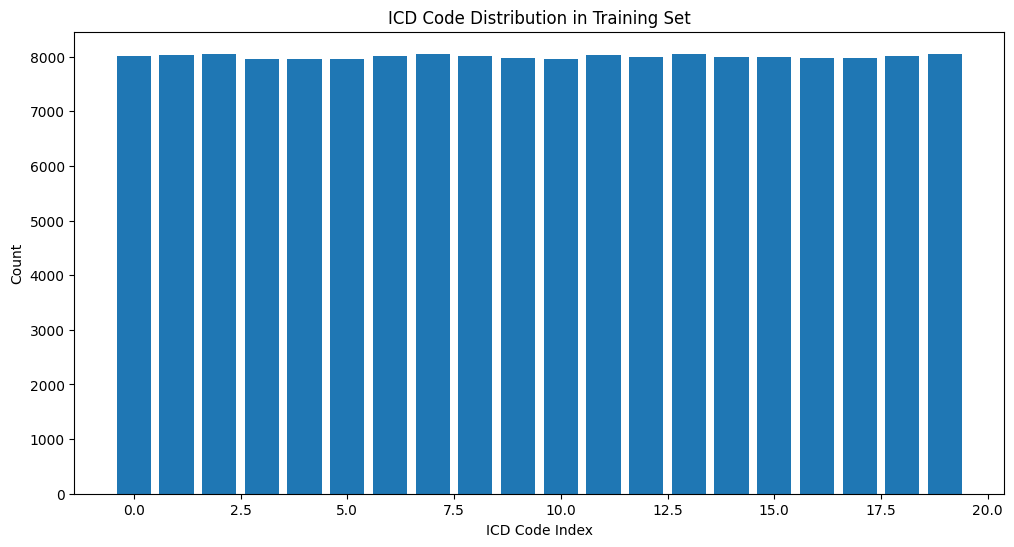

In [96]:
# Analyze class imbalance
from collections import Counter
import matplotlib.pyplot as plt

# Flatten the list of ICD codes in the training set
train_icd_counts = Counter([icd for codes in train_labels for icd, present in enumerate(codes) if present == 1])

# Visualize the distribution
labels, counts = zip(*train_icd_counts.items())
plt.figure(figsize=(12, 6))
plt.bar(labels, counts)
plt.title("ICD Code Distribution in Training Set")
plt.xlabel("ICD Code Index")
plt.ylabel("Count")
plt.show()


In [97]:
import re

def preprocess_notes(text):
    # Remove special characters and extra spaces
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    return text.strip()

# Apply preprocessing to clinical notes
df_consolidated['clinical_notes'] = df_consolidated['clinical_notes'].apply(preprocess_notes)
print("Clinical notes preprocessed.")


Clinical notes preprocessed.


In [98]:
epochs = 10  # Increased epochs
optimizer = AdamW(model.parameters(), lr=1e-5)  # Smaller learning rate

for epoch in range(epochs):
    model.train()
    total_loss = 0
    progress_bar = tqdm(train_loader, desc=f"Fine-Tuning ClinicalBERT Epoch {epoch + 1}/{epochs}", unit="batch")
    for batch in progress_bar:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = criterion(logits, labels)
        total_loss += loss.item()

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lr_scheduler.step()

        progress_bar.set_postfix({"loss": loss.item()})
    print(f"Epoch {epoch + 1} Loss: {total_loss / len(train_loader)}")


/opt/anaconda3/envs/NLP_project/lib/python3.12/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Fine-Tuning ClinicalBERT Epoch 1/10: 100%|██████████| 4660/4660 [25:34<00:00,  3.04batch/s, loss=0.349]


Epoch 1 Loss: 0.29205599710856894


Fine-Tuning ClinicalBERT Epoch 2/10: 100%|██████████| 4660/4660 [24:40<00:00,  3.15batch/s, loss=0.231]


Epoch 2 Loss: 0.28585160344263516


Fine-Tuning ClinicalBERT Epoch 3/10: 100%|██████████| 4660/4660 [28:13<00:00,  2.75batch/s, loss=0.332]


Epoch 3 Loss: 0.27838281857033653


Fine-Tuning ClinicalBERT Epoch 4/10: 100%|██████████| 4660/4660 [35:07<00:00,  2.21batch/s, loss=0.222]


Epoch 4 Loss: 0.26979956957531587


Fine-Tuning ClinicalBERT Epoch 5/10: 100%|██████████| 4660/4660 [33:47<00:00,  2.30batch/s, loss=0.318]


Epoch 5 Loss: 0.2609549741024879


Fine-Tuning ClinicalBERT Epoch 6/10: 100%|██████████| 4660/4660 [33:39<00:00,  2.31batch/s, loss=0.245]


Epoch 6 Loss: 0.25134741251432846


Fine-Tuning ClinicalBERT Epoch 7/10: 100%|██████████| 4660/4660 [33:51<00:00,  2.29batch/s, loss=0.207]


Epoch 7 Loss: 0.24105088054622192


Fine-Tuning ClinicalBERT Epoch 8/10: 100%|██████████| 4660/4660 [35:11<00:00,  2.21batch/s, loss=0.141]


Epoch 8 Loss: 0.23084509592391392


Fine-Tuning ClinicalBERT Epoch 9/10: 100%|██████████| 4660/4660 [32:06<00:00,  2.42batch/s, loss=0.224]


Epoch 9 Loss: 0.2201549998920235


Fine-Tuning ClinicalBERT Epoch 10/10: 100%|██████████| 4660/4660 [34:18<00:00,  2.26batch/s, loss=0.173]

Epoch 10 Loss: 0.20929217975858455


In [99]:
threshold = 0.4  # Experiment with thresholds
predictions, true_labels = [], []

model.eval()
with torch.no_grad():
    for batch in val_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = (torch.sigmoid(logits) > threshold).cpu().numpy()
        predictions.extend(preds)
        true_labels.extend(labels.cpu().numpy())

# Metrics for multi-label classification
from sklearn.metrics import accuracy_score, classification_report
print("Validation Accuracy:", accuracy_score(true_labels, predictions))
print("Classification Report:")
print(classification_report(true_labels, predictions, target_names=mlb.classes_))


Validation Accuracy: 0.05665539996780943
Classification Report:
              precision    recall  f1-score   support

        D649       0.21      0.06      0.10      1979
        E039       0.43      0.25      0.32      1975
        E119       0.37      0.31      0.34      1951
        E669       0.29      0.19      0.23      2036
        E785       0.24      0.07      0.11      2046
      F17210       0.35      0.30      0.32      2037
        F329       0.29      0.13      0.18      1993
        F419       0.33      0.17      0.23      1946
       G4733       0.38      0.33      0.35      1982
         I10       0.21      0.12      0.15      2031
       I2510       0.37      0.24      0.29      2034
       I4891       0.43      0.51      0.46      1975
      J45909       0.43      0.28      0.34      2005
        K219       0.26      0.07      0.11      1957
        N179       0.23      0.20      0.22      2002
        Y929       0.30      0.20      0.24      2000
         Z66     

/opt/anaconda3/envs/NLP_project/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# SVM

In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/combined_hadm_id.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Display the column names
print("Columns in the CSV file:")
print(df.columns)


Columns in the CSV file:
Index(['subject_id_x', 'hadm_id', 'admittime', 'dischtime', 'deathtime',
       'admission_type', 'admit_provider_id', 'admission_location',
       'discharge_location', 'insurance', 'language', 'marital_status', 'race',
       'edregtime', 'edouttime', 'hospital_expire_flag', 'subject_id_y',
       'seq_num', 'icd_code', 'icd_version', 'note_id', 'subject_id',
       'note_type', 'note_seq', 'charttime', 'storetime', 'text'],
      dtype='object')


In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/combined_hadm_id.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Specify the columns of interest
columns_of_interest = [
    'hadm_id', 'admission_type', 'admit_provider_id', 'admission_location',
    'marital_status', 'race', 'seq_num', 'icd_code', 'icd_version', 'note_id',
    'subject_id', 'note_type', 'note_seq', 'text'
]

# Select only the columns of interest
filtered_df = df[columns_of_interest]

# Save the filtered DataFrame to a new CSV file
output_file_path = '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/filtered_hadm_id.csv'  # Replace with your desired output file path
filtered_df.to_csv(output_file_path, index=False)

print(f"Filtered CSV saved to: {output_file_path}")


Filtered CSV saved to: /Users/benjamintan/Downloads/mimic-iv-3.1/hosp/filtered_hadm_id.csv


In [ ]:
# Print the first 10 rows of the 'text' column
# Set display options to avoid truncation
pd.set_option('display.max_colwidth', None)

filtered_df['text'].head(10)

0     \nName:  ___             Unit No:   ___\n \nAdmission Date:  ___              Discharge Date:   ___\n \nDate of Birth:  ___             Sex:   F\n \nService: MEDICINE\n \nAllergies: \nNo Known Allergies / Adverse Drug Reactions\n \nAttending: ___.\n \nChief Complaint:\nfever, nausea/vomiting, flank pain\n \nMajor Surgical or Invasive Procedure:\nnone \n\n \nHistory of Present Illness:\nHISTORY OF PRESENT ILLNESS:  \nMs. ___ is a ___ year old ___ speaking lady with DM2 and \nHTN who was evaluated in the ED ___, diagnosed with UTI and \ntreated with macrobid, who returned with bilateral flank pain \nL>R, fevers, chills, sweats, nausea, vomiting, headache, \ndysuria. Denied neck stiffness. She was evaluated in ED \ninitially with dizziness, headache, fever, found ot have a UTI \nand discharged home w macrobid, which she took, but felt worse \ntoday. She endorses minimal urine output that is dark.  \nIn the ED, initial vs were: ___ pain 99.3 97 151/53 16 96% \nyest. Today initial vit

In [ ]:
import pandas as pd
import re
from tqdm import tqdm

# Load the CSV file
file_path = '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/filtered_hadm_id.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Function to extract specific sections of interest
def extract_sections(text):
    # Check if text is a valid string
    if not isinstance(text, str):
        return {
            'History of Present Illness': '',
            'Past Medical History': '',
            'Physical Exam': ''
        }

    # Regular expression to extract "History of Present Illness"
    history_present_illness = re.search(r'History of Present Illness:([\s\S]*?)(?=\n\n|Past Medical History:|Physical Exam:|\Z)', text, re.S | re.I)
    history_present_illness = history_present_illness.group(1).strip() if history_present_illness else ''

    # Regular expression to extract "Past Medical History"
    past_medical_history = re.search(r'Past Medical History:([\s\S]*?)(?=\n\n|History of Present Illness:|Physical Exam:|\Z)', text, re.S | re.I)
    past_medical_history = past_medical_history.group(1).strip() if past_medical_history else ''

    # Regular expression to extract "Physical Exam"
    physical_exam = re.search(r'Physical Exam:([\s\S]*?)(?=\n\n|History of Present Illness:|Past Medical History:|\Z)', text, re.S | re.I)
    physical_exam = physical_exam.group(1).strip() if physical_exam else ''

    # Combine the extracted sections into a dictionary
    return {
        'History of Present Illness': history_present_illness,
        'Past Medical History': past_medical_history,
        'Physical Exam': physical_exam
    }

# Apply the extraction function to the 'text' column with tqdm progress bar
tqdm.pandas()
extracted_data = df['text'].progress_apply(extract_sections)

# Convert the extracted data to a DataFrame
df_extracted = pd.DataFrame(extracted_data.tolist())

# Concatenate the extracted columns with the original dataframe (excluding the old 'text' column)
df_combined = pd.concat([df.drop(columns=['text']), df_extracted], axis=1)


100%|██████████| 6365080/6365080 [10:02<00:00, 10566.64it/s]


In [ ]:
# Save the new DataFrame with the extracted columns to a CSV file
output_file_path = '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/extracted_sections.csv'  # Replace with your desired output file path
df_combined.to_csv(output_file_path, index=False)

print(f"Extracted sections saved to: {output_file_path}")

Extracted sections saved to: /Users/benjamintan/Downloads/mimic-iv-3.1/hosp/extracted_sections.csv


In [ ]:
# Drop rows where all extracted columns are empty
df_combined = df_combined[~(df_combined['History of Present Illness'] == '') & ~(df_combined['Past Medical History'] == '') & ~(df_combined['Physical Exam'] == '')]

In [ ]:
df_combined.count() == 0

# Count rows where all extracted columns are empty
empty_rows_count = df_combined[
    (df_combined['History of Present Illness'] == '') &
    (df_combined['Past Medical History'] == '') &
    (df_combined['Physical Exam'] == '')
].shape[0]

print(f"Number of rows where all extracted columns are empty: {empty_rows_count}")

Number of rows where all extracted columns are empty: 0


In [ ]:
# Save the new DataFrame with the extracted columns to a CSV file
output_file_path = '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/extracted_sections_drop_empty.csv'  # Replace with your desired output file path
df_combined.to_csv(output_file_path, index=False)

print(f"Extracted sections saved to: {output_file_path}")

Extracted sections saved to: /Users/benjamintan/Downloads/mimic-iv-3.1/hosp/extracted_sections_drop_empty.csv


In [10]:
import pandas as pd

# Load the CSV file
file_path = '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/extracted_sections_drop_empty.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Randomly sample 500,000 rows from the DataFrame
df_sampled = df.sample(n=300000, random_state=42)

# Save the reduced dataset to a new CSV file
output_file_path = '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/extracted_sections_sampled_300000.csv'
df_sampled.to_csv(output_file_path, index=False)

print(f"Sampled dataset saved to: {output_file_path}")


Sampled dataset saved to: /Users/benjamintan/Downloads/mimic-iv-3.1/hosp/extracted_sections_sampled_300000.csv


In [ ]:
import pandas as pd
from tqdm import tqdm
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the CSV file
file_path = '/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/extracted_sections_sampled.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Preprocess: Combine columns of interest into a single text field
df['combined_text'] = (
    df['History of Present Illness'].fillna('') + ' ' +
    df['Past Medical History'].fillna('') + ' ' +
    df['Physical Exam'].fillna('')
)

# Load ClinicalBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

# Function to generate embeddings using ClinicalBERT
def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Use the [CLS] token representation as the sentence embedding
    embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
    return embedding

# Generate embeddings for each row (this may take a while for a large dataset)
embeddings = []
for text in tqdm(df['combined_text'], desc="Generating Embeddings"):
    embeddings.append(get_embedding(text))

# Convert embeddings to a DataFrame
embeddings_df = pd.DataFrame(embeddings)

# Prepare the labels and features
X = embeddings_df
y = df['icd_code']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (e.g., Logistic Regression) to predict ICD codes
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


/opt/anaconda3/envs/NLP_project/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating Embeddings: 100%|██████████| 30000/30000 [1:09:31<00:00,  7.19it/s]    


Accuracy: 0.017666666666666667
Classification Report:
              precision    recall  f1-score   support

       00845       0.00      0.00      0.00         8
        0088       0.00      0.00      0.00         2
        0380       0.00      0.00      0.00         1
       03811       0.00      0.00      0.00         1
       03840       0.00      0.00      0.00         1
       03842       0.00      0.00      0.00         2
        0389       0.00      0.00      0.00         6
       04104       0.00      0.00      0.00         4
       04111       0.00      0.00      0.00         4
       04112       0.00      0.00      0.00         4
       04119       0.00      0.00      0.00         1
        0413       0.00      0.00      0.00         1
        0414       0.00      0.00      0.00         2
       04149       0.00      0.00      0.00         7
        0416       0.00      0.00      0.00         1
        0417       0.00      0.00      0.00         2
       04184       0.00    

/opt/anaconda3/envs/NLP_project/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/NLP_project/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/NLP_project/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res

# NER Feature Extraction then feed the features into SVM for training to predict ICD code

In [53]:
import pandas as pd
import spacy
import scispacy
from spacy import displacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span
from negspacy.negation import Negex

# Load scispaCy models
nlp0 = spacy.load("en_core_sci_sm")
nlp1 = spacy.load("en_ner_bc5cdr_md")

def lemmatize(note, nlp):
    """
    Lemmatize the input text using the specified spaCy model
    
    Args:
        note (str): Input text to lemmatize
        nlp (spacy.lang.en.English): spaCy language model
    
    Returns:
        str: Lemmatized text
    """
    doc = nlp(note)
    lemNote = [wd.lemma_ for wd in doc]
    return " ".join(lemNote)

def get_entity_options():
    """
    Define visualization options for Named Entities
    
    Returns:
        dict: Visualization options for displaCy
    """
    entities = ["DISEASE", "CHEMICAL", "NEG_ENTITY"]
    colors = {
        'DISEASE': 'linear-gradient(180deg, #66ffcc, #abf763)', 
        'CHEMICAL': 'linear-gradient(90deg, #aa9cfc, #fc9ce7)', 
        "NEG_ENTITY":'linear-gradient(90deg, #ffff66, #ff6600)'
    }
    return {"ents": entities, "colors": colors}

def neg_model(nlp_model):
    """
    Create a negation detection pipeline
    
    Args:
        nlp_model (str): Path to spaCy model
    
    Returns:
        spacy.lang.en.English: spaCy model with negation detection
    """
    nlp = spacy.load(nlp_model, disable=['parser'])
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    
    # Enhanced negation detection with custom patterns
    negex = Negex(nlp)
    negex.preceding_patterns += [nlp('deny'), nlp('refuse'), nlp('neither'), nlp('nor')]
    negex.following_patterns += [nlp('absent'), nlp('deny'), nlp('decline')]
    
    nlp.add_pipe(negex)
    return nlp

def negation_handling(nlp_model, note, neg_model_func):
    """
    Identify negated entities in the text
    
    Args:
        nlp_model (str): Path to spaCy model
        note (str): Input text
        neg_model_func (function): Function to create negation model
    
    Returns:
        list: Negated entities
    """
    results = []
    nlp = neg_model_func(nlp_model)
    
    # Sentence tokenization
    note_sentences = [n.strip() for n in note.split(".")]
    
    for sentence in note_sentences:
        doc = nlp(sentence)
        for entity in doc.ents:
            if entity._.negex:
                results.append(entity.text)
    
    return results

def match(nlp, terms, label):
    """
    Create a PhraseMatcher for specified terms
    
    Args:
        nlp (spacy.lang.en.English): spaCy language model
        terms (list): List of terms to match
        label (str): Label for matched terms
    
    Returns:
        spacy.matcher.PhraseMatcher: Configured phrase matcher
    """
    patterns = [nlp.make_doc(text) for text in terms]
    matcher = PhraseMatcher(nlp.vocab)
    matcher.add(label, None, *patterns)
    return matcher

def overwrite_ent_lbl(matcher, doc):
    """
    Update entity labels for matched terms
    
    Args:
        matcher (spacy.matcher.PhraseMatcher): Phrase matcher
        doc (spacy.tokens.Doc): spaCy document
    
    Returns:
        spacy.tokens.Doc: Updated document with new entity labels
    """
    matches = matcher(doc)
    seen_tokens = set()
    new_entities = []
    entities = doc.ents
    
    for match_id, start, end in matches:
        if start not in seen_tokens and end - 1 not in seen_tokens:
            new_entities.append(Span(doc, start, end, label=match_id))
            entities = [
                e for e in entities if not (e.start < end and e.end > start)
            ]
            seen_tokens.update(range(start, end))
    
    doc.ents = tuple(entities) + tuple(new_entities)
    return doc

def process_clinical_notes(file_path):
    """
    Main processing function for clinical notes in CSV
    
    Args:
        file_path (str): Path to CSV file
    
    Returns:
        pd.DataFrame: Processed dataframe with NLP features
    """
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Preprocess: Combine columns of interest
    df['combined_text'] = (
        df['History of Present Illness'].fillna('') + ' ' +
        df['Past Medical History'].fillna('') + ' ' +
        df['Physical Exam'].fillna('')
    )
    
    # Lemmatize the combined text
    df['lemmatized_text'] = df['combined_text'].apply(lambda x: lemmatize(x, nlp0))
    
    # Prepare visualization options
    options = get_entity_options()
    
    # Process each note
    def process_note(note):
        try:
            # Named Entity Recognition
            doc = nlp1(note)
            
            # Negation Detection
            neg_results = negation_handling("en_ner_bc5cdr_md", note, neg_model)
            
            # Update entity labels
            if neg_results:
                matcher = match(nlp1, neg_results, "NEG_ENTITY")
                doc = overwrite_ent_lbl(matcher, doc)
            
            # Render entities (this would typically be displayed or saved)
            # displacy.render(doc, style='ent', options=options)
            
            return doc
        except Exception as e:
            print(f"Error processing note: {e}")
            return None
    
    # Apply processing to lemmatized text
    df['processed_doc'] = df['lemmatized_text'].apply(process_note)
    
    return df

In [63]:
import pandas as pd
import spacy
import scispacy
from spacy import displacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span
from negspacy.negation import Negex

# Load scispaCy models
nlp0 = spacy.load("en_core_sci_sm")
nlp1 = spacy.load("en_ner_bc5cdr_md")

def lemmatize(note, nlp):
    """Lemmatize the input text"""
    doc = nlp(note)
    lemNote = [wd.lemma_ for wd in doc]
    return " ".join(lemNote)

def get_entity_options():
    """Define visualization options for Named Entities"""
    entities = ["DISEASE", "CHEMICAL", "NEG_ENTITY"]
    colors = {
        'DISEASE': 'linear-gradient(180deg, #66ffcc, #abf763)', 
        'CHEMICAL': 'linear-gradient(90deg, #aa9cfc, #fc9ce7)', 
        "NEG_ENTITY":'linear-gradient(90deg, #ffff66, #ff6600)'
    }
    return {"ents": entities, "colors": colors}

def process_single_note(file_path, row_index):
    """
    Process and visualize a single note from the CSV
    
    Args:
        file_path (str): Path to CSV file
        row_index (int): Index of the row to process
    """
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Combine columns of interest
    combined_text = (
        df['History of Present Illness'].fillna('').iloc[row_index] + ' ' +
        df['Past Medical History'].fillna('').iloc[row_index] + ' ' +
        df['Physical Exam'].fillna('').iloc[row_index]
    )
    
    # Lemmatize the text
    lemmatized_text = lemmatize(combined_text, nlp0)
    
    # Prepare visualization options
    options = get_entity_options()
    
    # Process the note with NER
    doc = nlp1(lemmatized_text)
    
    # Print original entities
    print("Original Named Entities:")
    for ent in doc.ents:
        print(f"{ent.text} - {ent.label_}")
    
    # Negation Detection
    def custom_neg_handling(doc):
        """
        Custom negation detection with predefined negation terms
        """
        # Common negation terms
        negation_terms = [
            'no', 'not', 'neither', 'never', 'none', 
            'denied', 'deny', 'absence', 'without', 
            'rule out', 'ruled out'
        ]
        
        negated_entities = []
        
        # Iterate through sentences
        for sent in doc.sents:
            # Check for negation terms near entities
            for ent in sent.ents:
                # Look at surrounding tokens for negation
                context = [token.lower_ for token in sent if abs(token.idx - ent.start_char) < 20]
                if any(neg in context for neg in negation_terms):
                    negated_entities.append(ent.text)
        
        return negated_entities
    
    # Get negated entities using custom method
    neg_results = []
    try:
        # Try custom negation detection
        neg_results = custom_neg_handling(doc)
    except Exception as e:
        print(f"Error in negation detection: {e}")
    
    print("\nNegated Entities:")
    print(neg_results)
    
    # Prepare entity information
    entity_info = []
    for ent in doc.ents:
        entity_info.append({
            'text': ent.text,
            'label': ent.label_,
            'negated': ent.text in neg_results
        })
    
    # Print detailed entity information
    print("\nDetailed Entity Information:")
    for info in entity_info:
        print(f"Entity: {info['text']} (Type: {info['label']}, Negated: {info['negated']})")
    
    # Visualize entities
    print("\nEntity Visualization:")
    try:
        displacy.serve(doc, style='ent', options=options)
    except Exception as e:
        print(f"Visualization error: {e}")
    
    # Return the processed document and entity information
    return doc, entity_info

# Uncomment and run
# process_single_note('extracted_sections_sampled.csv', 90)

In [64]:
process_single_note('extracted_sections_sampled.csv', 90)

#processed_df = process_clinical_notes('extracted_sections_sampled.csv')
#processed_df.head()

Original Named Entities:
heart failure - DISEASE
pulmonary hypertension - DISEASE
MCA stroke - CHEMICAL
l hemiparesis - DISEASE
seizure - DISEASE
s/p decease donor renal transplant - DISEASE
htn - DISEASE
Pain - DISEASE
inferior ischemia - DISEASE
leave hemiparesis - DISEASE
seizure - DISEASE
ESRD - DISEASE
hypertension - DISEASE
depression - DISEASE
anxiety - DISEASE
pain - DISEASE
osteomyelitis - DISEASE
CAD - DISEASE
arthritis - DISEASE
Father - colorectal cancer - DISEASE
erythema - DISEASE
tenderness - DISEASE
infection - DISEASE
redness - DISEASE
perrl - DISEASE

Negated Entities:
['redness']

Detailed Entity Information:
Entity: heart failure (Type: DISEASE, Negated: False)
Entity: pulmonary hypertension (Type: DISEASE, Negated: False)
Entity: MCA stroke (Type: CHEMICAL, Negated: False)
Entity: l hemiparesis (Type: DISEASE, Negated: False)
Entity: seizure (Type: DISEASE, Negated: False)
Entity: s/p decease donor renal transplant (Type: DISEASE, Negated: False)
Entity: htn (Type:

(_ _ _ be a _ _ _ year old female with history of chronic 
  diastolic heart failure , pulmonary hypertension , cad , partial r 
  MCA stroke ( mild l hemiparesis and seizure disorder _ _ _ , 
  esrd ( s/p decease donor renal transplant at _ _ _ [ _ _ _ ] 
  complicated by ckd ) , htn , Depression/Anxiety , Chronic Pain 
  ( recently find to have violate opiate contract ) , and new 
  diagnosis of esrd ( now on hd _ _ _ who present for evaluation 
  of weakness . - chronic diastolic heart failure 
  - pah with rv dilation 
  - stable cad w/reversible inferior ischemia on stress test 
  ( _ _ _ ) 
  - Partial R MCA stroke w/ mild leave hemiparesis and seizure d/o 
  ( _ _ _ ) 
  - ESRD s/p ddrt at _ _ _ ( _ _ _ ) c/b ckd stage iv 
  - hypertension 
  - depression and anxiety 
  - chronic lle pain 
  - leave tkr _ _ _ c/b mssa pji s/p hardware removal , 
  antibiotic spacer , and multiple washout . 
  - Pathological left tibia fracture _ _ _ ( presumed 
  osteomyelitis ) ; fail conservat

In [1]:
import pandas as pd
import spacy
import scispacy
from spacy import displacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span
import os

def lemmatize(note, nlp):
    """Lemmatize the input text to capture different word forms"""
    doc = nlp(note)
    lemNote = [wd.lemma_ for wd in doc]
    return " ".join(lemNote)

def get_entity_options():
    """Define visualization options for Named Entities"""
    entities = ["DISEASE", "CHEMICAL", "NEG_ENTITY"]
    colors = {
        'DISEASE': 'linear-gradient(180deg, #66ffcc, #abf763)', 
        'CHEMICAL': 'linear-gradient(90deg, #aa9cfc, #fc9ce7)', 
        "NEG_ENTITY": 'linear-gradient(90deg, #ffff66, #ff6600)'
    }
    return {"ents": entities, "colors": colors}

def custom_neg_handling(doc):
    """
    Enhanced negation detection with comprehensive context analysis
    
    Args:
        doc (spacy.tokens.Doc): Processed spaCy document
    
    Returns:
        dict: A dictionary with detailed negation information
    """
    # Comprehensive negation terms and patterns
    negation_terms = {
        'direct': [
            'no', 'not', 'never', 'neither', 'none', 
            'absence', 'absent', 'denied', 'deny', 
            'rule out', 'ruled out', 'without', 'hasn\'t', 
            'haven\'t', 'didn\'t', 'don\'t', 'cannot', 
            'can\'t', 'no evidence', 'negates', 'negative'
        ],
        'pre_modifiers': [
            'unlikely', 'improbable', 'doubtful', 
            'unconfirmed', 'unconvinced'
        ],
        'post_modifiers': [
            'free', 'clear', 'resolved', 'eliminated'
        ]
    }
    
    negation_results = {
        'negated_entities': [],
        'detailed_negations': []
    }
    
    # Iterate through sentences
    for sent in doc.sents:
        for ent in sent.ents:
            # Wider context window for negation detection
            context_window = 25  # characters before and after the entity
            
            # Extract context tokens
            context_tokens = [
                token for token in sent 
                if abs(token.idx - ent.start_char) < context_window
            ]
            
            # Convert context to lowercase for easier matching
            context_lower = [token.lower_ for token in context_tokens]
            
            # Check for direct negation terms
            is_negated = any(neg in context_lower for neg in negation_terms['direct'])
            
            # Check for pre and post negation modifiers
            pre_neg = any(mod in context_lower[:3] for mod in negation_terms['pre_modifiers'])
            post_neg = any(mod in context_lower[-3:] for mod in negation_terms['post_modifiers'])
            
            # Detailed negation analysis
            if is_negated or pre_neg or post_neg:
                negation_details = {
                    'entity': ent.text,
                    'type': ent.label_,
                    'context': ' '.join([token.text for token in context_tokens]),
                    'negation_type': 'direct' if is_negated else 'modified'
                }
                
                negation_results['negated_entities'].append(ent.text)
                negation_results['detailed_negations'].append(negation_details)
    
    return negation_results

def print_negation_analysis(negation_results):
    """
    Print a detailed analysis of negated entities
    
    Args:
        negation_results (dict): Negation analysis results
    """
    print("\nNegation Analysis:")
    if not negation_results['negated_entities']:
        print("No negated entities found.")
        return
    
    print(f"Negated Entities: {negation_results['negated_entities']}")
    print("\nDetailed Negation Information:")
    for neg in negation_results['detailed_negations']:
        print(f"Entity: {neg['entity']} (Type: {neg['type']})")
        print(f"Context: {neg['context']}")
        print(f"Negation Type: {neg['negation_type']}\n")

def process_single_note(file_path, row_index, output_dir='ner_visualizations'):
    """
    Process and visualize a single note from the CSV with enhanced output
    
    Args:
        file_path (str): Path to CSV file
        row_index (int): Index of the row to process
        output_dir (str): Directory to save visualization output
    """
    # Load scispaCy models
    try:
        nlp0 = spacy.load("en_core_sci_sm")
        nlp1 = spacy.load("en_ner_bc5cdr_md")
    except OSError as e:
        print(f"Error loading spaCy models: {e}")
        print("Make sure you have installed the models using:")
        print("python -m spacy download en_core_sci_sm")
        print("python -m spacy download en_ner_bc5cdr_md")
        raise

    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Combine columns of interest
    try:
        combined_text = (
            df['History of Present Illness'].fillna('').iloc[row_index] + ' ' +
            df['Past Medical History'].fillna('').iloc[row_index] + ' ' +
            df['Physical Exam'].fillna('').iloc[row_index]
        )
    except KeyError as e:
        print(f"Column not found in the CSV: {e}")
        print("Available columns:", list(df.columns))
        raise
    except IndexError:
        print(f"Row index {row_index} is out of bounds. Total rows: {len(df)}")
        raise

    # Lemmatize the text
    lemmatized_text = lemmatize(combined_text, nlp0)
    
    # Prepare visualization options
    options = get_entity_options()
    
    # Process the note with NER
    doc = nlp1(lemmatized_text)
    
    # Get negated entities
    neg_results = custom_neg_handling(doc)
    
    # Print negation analysis
    print_negation_analysis(neg_results)
    
    # Modify entities to include negation
    negated_entities = neg_results['negated_entities']
    neg_entity_label = "NEG_ENTITY"

    if neg_entity_label not in doc.vocab.strings:
      doc.vocab.strings.add(neg_entity_label)
    # Create a new list of entities to replace the existing ones
    modified_entities = []
    for ent in doc.ents:
        if ent.text in negated_entities:
            # Create a new span with NEG_ENTITY label
            new_ent = Span(doc, ent.start, ent.end, label=doc.vocab.strings["NEG_ENTITY"])
            modified_entities.append(new_ent)
        else:
            modified_entities.append(ent)
    
    # Replace the document's entities
    doc.ents = tuple(modified_entities)
    
    # Diagnostic print for entities
    print("\nDetected Entities:")
    for ent in doc.ents:
        print(f"{ent.text} (Type: {ent.label_})")

    # Prepare the HTML visualization with explicit parameters
    try:
        html = displacy.render(doc, style='ent', options=options, page=True)
        
        # Ensure html is a string 
        if not isinstance(html, str):
            html = str(html)
        
        # Generate output file path
        output_file = os.path.join(output_dir, f'ner_visualization_row_{row_index}.html')
        
        # Write the visualization to an HTML file
        with open(output_file, 'w', encoding='utf-8') as f:
            f.write(html)
        
        print(f"\nVisualization saved to: {output_file}")
        
        return doc, output_file

    except Exception as e:
        print(f"Error generating HTML visualization: {e}")
        raise

# Diagnostic function to check CSV contents
def preview_csv(file_path, num_rows=5):
    """
    Preview the contents of the CSV file
    
    Args:
        file_path (str): Path to the CSV file
        num_rows (int): Number of rows to preview
    """
    df = pd.read_csv(file_path)
    print("CSV Columns:", list(df.columns))

# Example usage with error handling
def main():
    try:
        # First, preview the CSV to understand its structure
        preview_csv('extracted_sections_sampled.csv')
        
        # Then attempt to process a specific row
        doc, output_file = process_single_note('extracted_sections_sampled.csv', 20)
        print(f"\nOpen the HTML file at: {output_file}")
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()

CSV Columns: ['hadm_id', 'admission_type', 'admit_provider_id', 'admission_location', 'marital_status', 'race', 'seq_num', 'icd_code', 'icd_version', 'note_id', 'subject_id', 'note_type', 'note_seq', 'History of Present Illness', 'Past Medical History', 'Physical Exam']


/opt/anaconda3/envs/NLP_project/lib/python3.12/site-packages/spacy/language.py:2195: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]



Negation Analysis:
Negated Entities: ['respiratory distress', 'wheeze', 'rash']

Detailed Negation Information:
Entity: respiratory distress (Type: DISEASE)
Context: : appear in no respiratory distress , clear
Negation Type: direct

Entity: wheeze (Type: DISEASE)
Context: , no crackle , wheeze , or rhonchi 
  gastrointestinal
Negation Type: direct

Entity: rash (Type: DISEASE)
Context: 
  skin : no significant rash
Negation Type: direct


Detected Entities:
pancreatic cancer (Type: DISEASE)
gemcitabine (Type: CHEMICAL)
pain (Type: DISEASE)
cancer (Type: DISEASE)
-lumbar disc disease (Type: DISEASE)
sciatica (Type: DISEASE)
-anxiety (Type: DISEASE)
femur fracture (Type: DISEASE)
perll (Type: CHEMICAL)
respiratory distress (Type: NEG_ENTITY)
wheeze (Type: NEG_ENTITY)
rhonchi (Type: DISEASE)
edema (Type: DISEASE)
rash (Type: NEG_ENTITY)



Visualization saved to: ner_visualizations/ner_visualization_row_20.html

Open the HTML file at: ner_visualizations/ner_visualization_row_20.html


# Use this to extract the diseases into a new column. Save the new file

In [42]:
import pandas as pd
import spacy
import scispacy
import os
from tqdm import tqdm  # For progress tracking

def extract_diseases_from_note(note, nlp0, nlp1):
    """
    Extract diseases from a medical note using NER with negation handling.

    Args:
        note (str): Medical note text
        nlp0 (spacy.language.Language): Lemmatization model
        nlp1 (spacy.language.Language): NER model

    Returns:
        list: List of unique disease entities
    """
    # Lemmatize the text
    lemmatized_text = lemmatize(note, nlp0)
    
    # Process the note with NER
    doc = nlp1(lemmatized_text)

    # Add NEG_ENTITY label to StringStore
    neg_entity_label = "NEG_ENTITY"
    if neg_entity_label not in doc.vocab.strings:
        doc.vocab.strings.add(neg_entity_label)

    # Detect negated entities
    neg_results = custom_neg_handling(doc)

    # Extract unique diseases excluding negated entities
    negated_entities = neg_results['negated_entities']
    diseases = set(ent.text for ent in doc.ents if ent.label_ == 'DISEASE' and ent.text not in negated_entities)

    return list(diseases)

def lemmatize(note, nlp):
    """Lemmatize the input text"""
    doc = nlp(note)
    return " ".join([wd.lemma_ for wd in doc])

def custom_neg_handling(doc):
    """
    Perform custom negation detection on a spaCy document.

    Args:
        doc (spacy.tokens.Doc): Processed spaCy document.

    Returns:
        dict: Dictionary with negated entities and detailed negation information.
    """
    negation_terms = {
        'direct': [
            'no', 'not', 'never', 'neither', 'none', 
            'absence', 'absent', 'denied', 'deny', 'denie',
            'rule out', 'ruled out', 'without', 'hasn\'t', 
            'haven\'t', 'didn\'t', 'don\'t', 'cannot', 
            'can\'t', 'no evidence', 'negates', 'negative'
        ],
        'pre_modifiers': [
            'unlikely', 'improbable', 'doubtful', 
            'unconfirmed', 'unconvinced'
        ],
        'post_modifiers': [
            'free', 'clear', 'resolved', 'eliminated'
        ]
    }
    
    negation_results = {
        'negated_entities': [],
        'detailed_negations': []
    }
    
    for ent in doc.ents:
        context_window = 25
        context_tokens = [
            token.text.lower() for token in doc[max(0, ent.start - 5): min(len(doc), ent.end + 5)]
        ]
        if any(term in context_tokens for term in negation_terms):
            negation_results['negated_entities'].append(ent.text)

    return negation_results

def process_csv_with_ner(input_file, output_file):
    """
    Process entire CSV file and extract diseases for each row.

    Args:
        input_file (str): Path to input CSV.
        output_file (str): Path to output CSV.
    """
    # Load scispaCy models
    try:
        nlp0 = spacy.load("en_core_sci_sm")
        nlp1 = spacy.load("en_ner_bc5cdr_md")
    except OSError as e:
        print(f"Error loading spaCy models: {e}")
        raise

    # Load the CSV file
    df = pd.read_csv(input_file)
    
    # Add new column for extracted diseases
    df['extracted_diseases'] = None

    print(f"Processing {len(df)} rows...")
    for index, row in tqdm(df.iterrows(), total=len(df)):
        try:
            clinical_notes = row['clinical_notes']  # Correctly reference the clinical_notes column
          
            # Extract diseases
            diseases = extract_diseases_from_note(clinical_notes, nlp0, nlp1)
            
            # Save diseases to the new column
            df.at[index, 'extracted_diseases'] = '; '.join(diseases) if diseases else None
        
        except Exception as e:
            print(f"Error processing row {index}: {e}")
    
    # Save updated CSV
    df.to_csv(output_file, index=False)
    print(f"\nProcessed CSV saved to: {output_file}")

def main():
    try:
        input_file = 'df_sampled.csv'
        output_file = 'extracted_sections_with_diseases.csv'
        
        process_csv_with_ner(input_file, output_file)
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


Processing 50000 rows...


100%|██████████| 50000/50000 [3:38:15<00:00,  3.82it/s]      



Processed CSV saved to: extracted_sections_with_diseases.csv


# Added 'denie' into the neg_entity checker

In [24]:
import pandas as pd
import spacy
import scispacy
from spacy import displacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span
import os

def lemmatize(note, nlp):
    """Lemmatize the input text to capture different word forms"""
    doc = nlp(note)
    lemNote = [wd.lemma_ for wd in doc]
    return " ".join(lemNote)

def get_entity_options():
    """Define visualization options for Named Entities"""
    entities = ["DISEASE", "CHEMICAL", "NEG_ENTITY"]
    colors = {
        'DISEASE': 'linear-gradient(180deg, #1ABC9C, #DAF7A6)', 
        'CHEMICAL': 'linear-gradient(90deg, #3498DB, #fc9ce7)', 
        "NEG_ENTITY": 'linear-gradient(90deg, #E74C3C, #ff6600)'
    }
    return {"ents": entities, "colors": colors}

def custom_neg_handling(doc):
    """
    Enhanced negation detection with comprehensive context analysis
    
    Args:
        doc (spacy.tokens.Doc): Processed spaCy document
    
    Returns:
        dict: A dictionary with detailed negation information
    """
    # Comprehensive negation terms and patterns
    negation_terms = {
        'direct': [
            'no', 'not', 'never', 'neither', 'none', 
            'absence', 'absent', 'denied', 'deny', 'denie',
            'rule out', 'ruled out', 'without', 'hasn\'t', 
            'haven\'t', 'didn\'t', 'don\'t', 'cannot', 
            'can\'t', 'no evidence', 'negates', 'negative'
        ],
        'pre_modifiers': [
            'unlikely', 'improbable', 'doubtful', 
            'unconfirmed', 'unconvinced'
        ],
        'post_modifiers': [
            'free', 'clear', 'resolved', 'eliminated'
        ]
    }
    
    negation_results = {
        'negated_entities': [],
        'detailed_negations': []
    }
    
    # Iterate through sentences
    for sent in doc.sents:
        for ent in sent.ents:
            # Wider context window for negation detection
            context_window = 25  # characters before and after the entity
            
            # Extract context tokens
            context_tokens = [
                token for token in sent 
                if abs(token.idx - ent.start_char) < context_window
            ]
            
            # Convert context to lowercase for easier matching
            context_lower = [token.lower_ for token in context_tokens]
            
            # Check for direct negation terms
            is_negated = any(neg in context_lower for neg in negation_terms['direct'])
            
            # Check for pre and post negation modifiers
            pre_neg = any(mod in context_lower[:3] for mod in negation_terms['pre_modifiers'])
            post_neg = any(mod in context_lower[-3:] for mod in negation_terms['post_modifiers'])
            
            # Detailed negation analysis
            if is_negated or pre_neg or post_neg:
                negation_details = {
                    'entity': ent.text,
                    'type': ent.label_,
                    'context': ' '.join([token.text for token in context_tokens]),
                    'negation_type': 'direct' if is_negated else 'modified'
                }
                
                negation_results['negated_entities'].append(ent.text)
                negation_results['detailed_negations'].append(negation_details)
    
    return negation_results

def print_negation_analysis(negation_results):
    """
    Print a detailed analysis of negated entities
    
    Args:
        negation_results (dict): Negation analysis results
    """
    print("\nNegation Analysis:")
    if not negation_results['negated_entities']:
        print("No negated entities found.")
        return
    
    print(f"Negated Entities: {negation_results['negated_entities']}")
    print("\nDetailed Negation Information:")
    for neg in negation_results['detailed_negations']:
        print(f"Entity: {neg['entity']} (Type: {neg['type']})")
        print(f"Context: {neg['context']}")
        print(f"Negation Type: {neg['negation_type']}\n")

def process_single_note(file_path, row_index, output_dir='ner_visualizations'):
    """
    Process and visualize a single note from the CSV with enhanced output
    
    Args:
        file_path (str): Path to CSV file
        row_index (int): Index of the row to process
        output_dir (str): Directory to save visualization output
    """
    # Load scispaCy models
    try:
        nlp0 = spacy.load("en_core_sci_sm")
        nlp1 = spacy.load("en_ner_bc5cdr_md")
    except OSError as e:
        print(f"Error loading spaCy models: {e}")
        print("Make sure you have installed the models using:")
        print("python -m spacy download en_core_sci_sm")
        print("python -m spacy download en_ner_bc5cdr_md")
        raise

    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Check if the row index is valid
    if row_index >= len(df):
        raise IndexError(f"Row index {row_index} is out of bounds for the given CSV file.")
    
    # Extract the note text
    if 'clinical_notes' not in df.columns:
        raise KeyError("The column 'clinical_notes' is not present in the CSV file.")
    
    clinical_notes = df.loc[row_index, 'clinical_notes']
    if pd.isna(clinical_notes):
        raise ValueError(f"The clinical notes at row {row_index} are missing or empty.")
    
    # Lemmatize the text
    lemmatized_text = lemmatize(clinical_notes, nlp0)
    
    # Prepare visualization options
    options = get_entity_options()
    
    # Process the note with NER
    doc = nlp1(lemmatized_text)
    
    # Get negated entities
    neg_results = custom_neg_handling(doc)
    
    # Print negation analysis
    print_negation_analysis(neg_results)
    
    # Modify entities to include negation
    negated_entities = neg_results['negated_entities']
    neg_entity_label = "NEG_ENTITY"

    if neg_entity_label not in doc.vocab.strings:
        doc.vocab.strings.add(neg_entity_label)
    
    # Create a new list of entities to replace the existing ones
    modified_entities = []
    for ent in doc.ents:
        if ent.text in negated_entities:
            # Create a new span with NEG_ENTITY label
            new_ent = Span(doc, ent.start, ent.end, label=doc.vocab.strings["NEG_ENTITY"])
            modified_entities.append(new_ent)
        else:
            modified_entities.append(ent)
    
    # Replace the document's entities
    doc.ents = tuple(modified_entities)
    
    # Diagnostic print for entities
    print("\nDetected Entities:")
    for ent in doc.ents:
        print(f"{ent.text} (Type: {ent.label_})")

    # Prepare the HTML visualization with explicit parameters
    try:
        html = displacy.render(doc, style='ent', options=options, page=True)
        
        # Ensure html is a string 
        if not isinstance(html, str):
            html = str(html)
        
        # Generate output file path
        output_file = os.path.join(output_dir, f'ner_visualization_row_{row_index}.html')
        
        # Write the visualization to an HTML file
        with open(output_file, 'w', encoding='utf-8') as f:
            f.write(html)
        
        print(f"\nVisualization saved to: {output_file}")
        
        return doc, output_file

    except Exception as e:
        print(f"Error generating HTML visualization: {e}")
        raise


# Diagnostic function to check CSV contents
def preview_csv(file_path, num_rows=5):
    """
    Preview the contents of the CSV file
    
    Args:
        file_path (str): Path to the CSV file
        num_rows (int): Number of rows to preview
    """
    df = pd.read_csv(file_path)
    print("CSV Columns:", list(df.columns))

# Example usage with error handling
def main():
    try:
        # First, preview the CSV to understand its structure
        preview_csv('df_sampled.csv')
        
        # Then attempt to process a specific row
        doc, output_file = process_single_note('df_sampled.csv', 2)
        print(f"\nOpen the HTML file at: {output_file}")
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()

CSV Columns: ['hadm_id', 'admission_type', 'icd_code', 'icd_version', 'long_title', 'clinical_notes']

Negation Analysis:
Negated Entities: ['cough', 'diarrhea', 'fever', 'denie headache', 'denie shortness of breath', 'chest pain', 'denie vomiting', 'diarrhea', 'dysuria', 'denie arthralgia', 'myalgia', 'rash']

Detailed Negation Information:
Entity: cough (Type: DISEASE)
Context: pain and a dry cough , but today he 
  deny
Negation Type: direct

Entity: diarrhea (Type: DISEASE)
Context: he deny diarrhea , 
  fever , chill
Negation Type: direct

Entity: fever (Type: DISEASE)
Context: he deny diarrhea , 
  fever , chill , or dysuria
Negation Type: direct

Entity: denie headache (Type: DISEASE)
Context: denie headache , sinus 
 
Negation Type: direct

Entity: denie shortness of breath (Type: DISEASE)
Context: denie shortness of breath
Negation Type: direct

Entity: chest pain (Type: DISEASE)
Context: denie chest pain , chest pressure
Negation Type: direct

Entity: denie vomiting (Type: DI


Visualization saved to: ner_visualizations/ner_visualization_row_2.html

Open the HTML file at: ner_visualizations/ner_visualization_row_2.html


# Start of ClinicalBert training:
Fine-Tuning ClinicalBERT with Linear Classification Layer

This model uses ClinicalBERT to process clinical notes and classify them into ICD-9 codes.

Process clinical notes through ClinicalBERT to get embeddings
Pass embeddings through a linear classification layer
Use binary cross-entropy loss for multi-label classification
Evaluate using AUROC, F1, Precision@k, and Recall@k

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

# Load the dataset
df_sampled = pd.read_csv('extracted_sections_with_diseases.csv')

# Filter for the top 50 most frequent ICD codes
top_50_codes = df_sampled['icd_code'].value_counts().head(50).index.tolist()
df_top50 = df_sampled[df_sampled['icd_code'].isin(top_50_codes)]

# Group by hadm_id and aggregate all related information
df_grouped = df_top50.groupby('hadm_id').agg({
    'extracted_diseases': 'first',  # Take the first extracted diseases (they should be same for each hadm_id)
    'icd_code': lambda x: list(set(x)),  # Get unique list of ICD codes
    'long_title': lambda x: list(set(x))  # Get unique list of descriptions
}).reset_index()

# Create multi-hot labels for the grouped data
mlb = MultiLabelBinarizer(classes=sorted(top_50_codes))
multi_hot_labels = mlb.fit_transform([set(codes) for codes in df_grouped['icd_code']])

# Split the data using MultilabelStratifiedKFold
mskf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_idx, test_idx = next(mskf.split(df_grouped, multi_hot_labels))

# Create train and test datasets
train_data = df_grouped.iloc[train_idx].reset_index(drop=True)
test_data = df_grouped.iloc[test_idx].reset_index(drop=True)

# Save the splits
train_data.to_csv('train_top50.csv', index=False)
test_data.to_csv('test_top50.csv', index=False)

print("\nDataset sizes:")
print(f"Train size: {len(train_data)}, Test size: {len(test_data)}")
print(f"Number of unique ICD codes: {len(top_50_codes)}")


Dataset sizes:
Train size: 13758, Test size: 3441
Number of unique ICD codes: 50


In [45]:
df_grouped.head()

,hadm_id,extracted_diseases,icd_code,long_title
0,20000057,"gu-; sore throat; cataract; hematoma; nausea ,...",[4019],[Unspecified essential hypertension]
1,20000235,sore throat; hypotension; bleed; asterixis; we...,[2449],[Unspecified acquired hypothyroidism]
2,20001825,ecchymosis; knee pain; lung cancer; erythema; ...,[4019],[Unspecified essential hypertension]
3,20002402,ulcer; heart \n disease \n\n \n Physical Exam ...,[53081],[Esophageal reflux]
4,20002634,sore throat; denie leg weakness; cholelithiasi...,[53081],[Esophageal reflux]


In [46]:
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
import torch
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score
from tqdm import tqdm

# Load the dataset
train_data = pd.read_csv('train_top50.csv')
test_data = pd.read_csv('test_top50.csv')

# Ensure `extracted_diseases` contains strings and handle NaN
train_data['extracted_diseases'] = train_data['extracted_diseases'].fillna("").astype(str)
test_data['extracted_diseases'] = test_data['extracted_diseases'].fillna("").astype(str)

# Define a custom Dataset for Clinical Notes
class ClinicalNotesDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])  # Ensure the text is a string
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "labels": torch.tensor(label, dtype=torch.float),
        }

# Generate multi-hot labels for train and test sets
# Ensure multi_hot_labels, train_idx, and test_idx are defined
train_labels = multi_hot_labels[train_idx]  # Use the same multi-hot labels for train set
test_labels = multi_hot_labels[test_idx]    # Use the same multi-hot labels for test set

unique_labels = top_50_codes 

# Unique labels for classification
unique_labels = list(range(train_labels.shape[1]))

# Load ClinicalBERT
tokenizer = BertTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model = BertForSequenceClassification.from_pretrained(
    "emilyalsentzer/Bio_ClinicalBERT", num_labels=len(unique_labels)
)

# Prepare datasets
train_dataset = ClinicalNotesDataset(
    train_data["extracted_diseases"].tolist(),
    train_labels,
    tokenizer,
    max_length=128
)
test_dataset = ClinicalNotesDataset(
    test_data["extracted_diseases"].tolist(),
    test_labels,
    tokenizer,
    max_length=128
)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)

# Define optimizer and loss
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
criterion = torch.nn.BCEWithLogitsLoss()

# Fine-tune ClinicalBERT
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    print(f"Epoch {epoch + 1}/{epochs}")
    for batch in tqdm(train_loader, desc="Training", leave=False):
        optimizer.zero_grad()
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}")

# Evaluate ClinicalBERT
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for batch in tqdm(test_loader, desc="Evaluating", leave=False):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.sigmoid(outputs.logits).cpu().numpy()
        all_preds.append(preds)
        all_labels.append(labels.cpu().numpy())

all_preds = np.vstack(all_preds)
all_labels = np.vstack(all_labels)

# Threshold predictions
threshold = 0.5
binary_preds = (all_preds > threshold).astype(int)

# Compute evaluation metrics
clinicalbert_auc = roc_auc_score(all_labels, all_preds, average="weighted")
clinicalbert_f1 = f1_score(all_labels, binary_preds, average="weighted")
print(f"ClinicalBERT: AUROC={clinicalbert_auc:.4f}, F1={clinicalbert_f1:.4f}")

# Compute precision and recall at k
def compute_precision_recall_at_k(y_true, y_pred_probs, k_values=[5, 10, 20]):
    results = {}
    for k in k_values:
        # Get top k predictions for each sample
        top_k_indices = np.argsort(y_pred_probs, axis=1)[:, -k:]
        
        # Create binary matrix for top k predictions
        y_pred_k = np.zeros_like(y_pred_probs)
        for i, indices in enumerate(top_k_indices):
            y_pred_k[i, indices] = 1
            
        # Calculate precision and recall
        precision = np.mean([np.sum(y_true[i, top_k_indices[i]]) / k 
                           for i in range(len(y_true))])
        recall = np.mean([np.sum(y_true[i, top_k_indices[i]]) / np.sum(y_true[i])
                         for i in range(len(y_true))])
        
        results[f'precision@{k}'] = precision
        results[f'recall@{k}'] = recall
    
    return results

pk_rk_metrics = compute_precision_recall_at_k(all_labels, all_preds)
for metric, value in pk_rk_metrics.items():
    print(f"ClinicalBERT {metric}: {value:.4f}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5


Epoch 1/5, Loss: 183.9885
Epoch 2/5


Epoch 2/5, Loss: 170.7726
Epoch 3/5


Epoch 3/5, Loss: 169.8578
Epoch 4/5


Epoch 4/5, Loss: 169.8645
Epoch 5/5


Epoch 5/5, Loss: 171.4136


ClinicalBERT: AUROC=0.4683, F1=0.0000
ClinicalBERT precision@5: 0.0583
ClinicalBERT recall@5: 0.2768
ClinicalBERT precision@10: 0.0441
ClinicalBERT recall@10: 0.4181
ClinicalBERT precision@20: 0.0345
ClinicalBERT recall@20: 0.6525


In [9]:
import pandas as pd
import spacy
import scispacy
import os
from tqdm import tqdm  # Added for progress tracking

def extract_diseases_from_note(note, nlp0, nlp1):
    """
    Extract diseases from a medical note using NER
    
    Args:
        note (str): Medical note text
        nlp0 (spacy.language.Language): Lemmatization model
        nlp1 (spacy.language.Language): NER model
    
    Returns:
        list: List of unique disease entities
    """
    # Lemmatize the text
    lemmatized_text = lemmatize(note, nlp0)
    
    # Process the note with NER
    doc = nlp1(lemmatized_text)
    
    # Extract unique diseases
    diseases = set(ent.text for ent in doc.ents if ent.label_ == 'DISEASE')
    
    return list(diseases)

def lemmatize(note, nlp):
    """Lemmatize the input text"""
    doc = nlp(note)
    lemNote = [wd.lemma_ for wd in doc]
    return " ".join(lemNote)

def process_csv_with_ner(input_file, output_file):
    """
    Process entire CSV file and extract diseases for each row
    
    Args:
        input_file (str): Path to input CSV
        output_file (str): Path to output CSV
    """
    # Load scispaCy models
    try:
        nlp0 = spacy.load("en_core_sci_sm")
        nlp1 = spacy.load("en_ner_bc5cdr_md")
    except OSError as e:
        print(f"Error loading spaCy models: {e}")
        print("Make sure you have installed the models using:")
        print("python -m spacy download en_core_sci_sm")
        print("python -m spacy download en_ner_bc5cdr_md")
        raise

    # Load the CSV file
    df = pd.read_csv(input_file)
    
    # Create a new column for diseases
    df['extracted_diseases'] = None

    # Prepare some logging and tracking
    total_rows = len(df)
    disease_extraction_stats = {
        'total_rows': total_rows,
        'rows_processed': 0,
        'total_diseases_extracted': 0,
        'rows_with_diseases': 0
    }

    # Process each row with a progress bar
    print(f"Processing {total_rows} rows...")
    for index, row in tqdm(df.iterrows(), total=total_rows):
        try:
            # Combine columns of interest
            combined_text = (
                str(row.get('History of Present Illness', '')) + ' ' +
                str(row.get('Past Medical History', '')) + ' ' +
                str(row.get('Physical Exam', ''))
            )
            
            # Extract diseases
            diseases = extract_diseases_from_note(combined_text, nlp0, nlp1)
            
            # Update tracking stats
            disease_extraction_stats['rows_processed'] += 1
            if diseases:
                disease_extraction_stats['rows_with_diseases'] += 1
                disease_extraction_stats['total_diseases_extracted'] += len(diseases)
            
            # Save diseases to the new column
            df.at[index, 'extracted_diseases'] = '; '.join(diseases) if diseases else None
        
        except Exception as e:
            print(f"Error processing row {index}: {e}")
    
    # Save the updated DataFrame
    df.to_csv(output_file, index=False)
    
    # Print detailed stats
    print("\nDisease Extraction Statistics:")
    print(f"Total Rows: {disease_extraction_stats['total_rows']}")
    print(f"Rows Processed: {disease_extraction_stats['rows_processed']}")
    print(f"Rows with Diseases: {disease_extraction_stats['rows_with_diseases']}")
    print(f"Total Diseases Extracted: {disease_extraction_stats['total_diseases_extracted']}")
    print(f"Percentage of Rows with Diseases: {disease_extraction_stats['rows_with_diseases'] / disease_extraction_stats['total_rows'] * 100:.2f}%")
    
    print(f"\nProcessed CSV saved to: {output_file}")
    
    return disease_extraction_stats

def main():
    try:
        input_file = 'extracted_sections_drop_empty.csv'
        output_file = 'extracted_sections_drop_empty_with_diseases.csv'
        
        process_csv_with_ner(input_file, output_file)
    
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()

Processing 4007409 rows...


  0%|          | 2395/4007409 [05:58<166:34:28,  6.68it/s]


KeyboardInterrupt: 

In [ ]:
import medspacy
import spacy
from medspacy.ner import TargetMatcher, TargetRule
import pandas as pd

# Load the MedSpaCy NLP pipeline
nlp = medspacy.load()

# Get the existing TargetMatcher from the pipeline
target_matcher = nlp.get_pipe("medspacy_target_matcher")

# Load the list of symptoms from the text file
symptoms_file_path = "symptoms.txt"  
with open(symptoms_file_path, 'r') as file:
    symptoms = file.readlines()

# Create TargetRule objects from the symptoms list
target_patterns = [TargetRule(symptom.strip(), "SYMPTOM") for symptom in symptoms]

# Add the rules to the TargetMatcher
target_matcher.add(target_patterns)

# Load the CSV file
file_path = 'extracted_sections_sampled.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Preprocess: Combine columns of interest into a single text field
df['combined_text'] = (
    df['History of Present Illness'].fillna('') + ' ' +
    df['Past Medical History'].fillna('') + ' ' +
    df['Physical Exam'].fillna('')
)

# Function to extract symptoms from text
def extract_symptoms(text):
    doc = nlp(text)
    symptoms_list = [ent.text for ent in doc.ents if ent.label_ == "SYMPTOM"]
    return symptoms_list

# Apply the function to the combined_text column and save the extracted symptoms
df['extracted_symptoms'] = df['combined_text'].apply(extract_symptoms)

# Save the updated DataFrame to a new CSV file
output_file_path = 'extracted_sections_with_symptoms.csv'
df.to_csv(output_file_path, index=False)

print(f"Symptoms extracted and saved to {output_file_path}")


In [ ]:
pd.set_option('display.max_colwidth', None)
df['text'].head(1)

0     \nName:  ___             Unit No:   ___\n \nAdmission Date:  ___              Discharge Date:   ___\n \nDate of Birth:  ___             Sex:   F\n \nService: MEDICINE\n \nAllergies: \nNo Known Allergies / Adverse Drug Reactions\n \nAttending: ___.\n \nChief Complaint:\nfever, nausea/vomiting, flank pain\n \nMajor Surgical or Invasive Procedure:\nnone \n\n \nHistory of Present Illness:\nHISTORY OF PRESENT ILLNESS:  \nMs. ___ is a ___ year old ___ speaking lady with DM2 and \nHTN who was evaluated in the ED ___, diagnosed with UTI and \ntreated with macrobid, who returned with bilateral flank pain \nL>R, fevers, chills, sweats, nausea, vomiting, headache, \ndysuria. Denied neck stiffness. She was evaluated in ED \ninitially with dizziness, headache, fever, found ot have a UTI \nand discharged home w macrobid, which she took, but felt worse \ntoday. She endorses minimal urine output that is dark.  \nIn the ED, initial vs were: ___ pain 99.3 97 151/53 16 96% \nyest. Today initial vit

In [ ]:
import pandas as pd
import os
# Specify the folder path
df = pd.read_csv('/Users/benjamintan/Downloads/mimic-iv-3.1/hosp/pharmacy.csv', low_memory=False)
print(df.head())

   subject_id   hadm_id  pharmacy_id       poe_id            starttime  \
0    10000032  22595853     12775705  10000032-55  2180-05-08 08:00:00   
1    10000032  22595853     18415984  10000032-42  2180-05-07 02:00:00   
2    10000032  22595853     23637373  10000032-35  2180-05-07 01:00:00   
3    10000032  22595853     26862314  10000032-41  2180-05-07 01:00:00   
4    10000032  22595853     30740602  10000032-27  2180-05-07 00:00:00   

              stoptime                   medication  proc_type  \
0  2180-05-07 22:00:00                   Furosemide  Unit Dose   
1  2180-05-07 22:00:00      Ipratropium Bromide Neb  Unit Dose   
2  2180-05-07 09:00:00                   Furosemide  Unit Dose   
3  2180-05-07 01:00:00           Potassium Chloride  Unit Dose   
4  2180-05-07 22:00:00  Sodium Chloride 0.9%  Flush  Unit Dose   

                               status            entertime  ... basal_rate  \
0  Discontinued via patient discharge  2180-05-07 09:32:35  ...        NaN   
1 

In [ ]:
!pip install transformers datasets torch scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 9.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 MB 1.3 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 1.0 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 1.3 MB/s eta 0:00:00-:--:--


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, AutoModel, AdamW
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import pandas as pd

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
base_model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

# Define a custom model
class ClinicalBERTClassifier(nn.Module):
    def __init__(self, base_model, num_labels):
        super(ClinicalBERTClassifier, self).__init__()
        self.base_model = base_model
        self.classifier = nn.Linear(base_model.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.base_model(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]  # Use [CLS] token representation
        logits = self.classifier(cls_output)
        return logits

# Initialize the model
num_labels = 50  # Adjust based on the number of ICD codes
model = ClinicalBERTClassifier(base_model, num_labels)
model.to("cuda" if torch.cuda.is_available() else "cpu")


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
0it [00:00, ?it/s]


ClinicalBERTClassifier(
  (base_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-

In [ ]:
# Dataset preparation
class ClinicalNotesDataset(Dataset):
    def __init__(self, notes, labels, tokenizer, max_len):
        self.notes = notes
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.notes)

    def __getitem__(self, index):
        note = str(self.notes[index])
        labels = torch.tensor(self.labels[index], dtype=torch.float32)
        encoding = self.tokenizer(note, max_length=self.max_len, padding="max_length", truncation=True, return_tensors="pt")
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "labels": labels
        }

In [ ]:
# Load data
df = pd.read_csv("mimic_data.csv")  # Placeholder file path
notes = df["notes"]
labels = df["icd_codes"].apply(lambda x: list(map(int, x.split(","))))  # Convert ICD codes to binary vectors

# Split data
train_size = 0.8
train_len = int(train_size * len(notes))
train_notes, val_notes = notes[:train_len], notes[train_len:]
train_labels, val_labels = labels[:train_len], labels[train_len:]

# Create datasets and dataloaders
max_len = 128
batch_size = 16
train_dataset = ClinicalNotesDataset(train_notes, train_labels, tokenizer, max_len)
val_dataset = ClinicalNotesDataset(val_notes, val_labels, tokenizer, max_len)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = AdamW(model.parameters(), lr=5e-5)

# Training loop
device = "cuda" if torch.cuda.is_available() else "cpu"

def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in train_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}")

        # Validation
        model.eval()
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch["input_ids"].to(device)
                attention_mask = batch["attention_mask"].to(device)
                labels = batch["labels"].to(device)
                outputs = model(input_ids, attention_mask)
                preds = torch.sigmoid(outputs).cpu().numpy() > 0.5
                all_preds.extend(preds)
                all_labels.extend(labels.cpu().numpy())

        f1 = f1_score(np.array(all_labels), np.array(all_preds), average="weighted")
        print(f"Validation F1 Score: {f1}")

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer)
